# Проект: 
# Clean_Games

[Сcылка на сайт организации](https://cleangames.org/)

<hr style="border: 2px solid green;" />

**Цели исследования**

- Помочь заказчику лучше понимать продукт, какие игры проводить, какие команды более релевантны
 
**Задачи**
- Подготовить описательные статистики игр и команд;
- Определить, какие игры привлекают наибольшее число участников;
- Выяснить какие критерии команды способствуют победе в чистых играх;
- Подготовить рекомендации на основе не только данных, но и сравнения конкурентов, личного опыта;
- Любые инсайты, которые найдутся в данных;

**Этапы выполнения проекта**
1. Знакомство с данными 
2. Предобработка данных
3. Исследовательски анализ данных (EDA)
4. Подготовка презентации

**В рамках исследования рассмотрены вопросы:**

**1. Описательные статистики игр и команд:**

- 1.1 География Чистых игр
- 1.2 Сезонность
- 1.3 Размеры команд 
- 1.4 Количество участников и формат Чистых Игр
- 1.5 Количество команд за одну игру

На какие вопросы отвечаем:
- визуализируем географию игр по координатам на карте мира;
- рассмотрим распределение количества игр по странам;
- рассмотрим распределение количества игр по городам;
- рассмотрим распределение количества игр по регионам;
- рассмотрим сезонность чистых игр (по годам, месяцам и дням недели);
- рассмотрим какие команды по количеству участников встречаются чаще всего;
- рассмотрим какие форматы игр проводятся и проанализируем их;
- рассмотрим в каких субъектах РФ и городах какие по формату Чистые игры проводятся.

**2. Чистые Игры по активностям (срезы по городам, регионам и играм)**

- 2.1 Артефакты
- 2.2 Фотоохота

На какие вопросы отвечаем:
- рассмотрим, на каких играх собирают больше всего артефактов и где (в каких городах, субъектах РФ)
- рассмотрим, на каких играх чаще делают фотоохоту (в каких городах, субъектах РФ)

**3. Критерии команды, способствующие победе в чистых играх**

На какие вопросы отвечаем:
- рассмотрим, на каких играх участники получили больше всего очков;
- рассмотрим, какие команды получили больше всего очков;
- рассмотрим, команды какого размера более эффективны (т.е. собирают наибольшее количество очков);
- [хорошо бы рассмотреть, какие команды по категории наиболее эффективны. Будет здорово, если заказчик поделится таблицей]

**4. Какие игры привлекают наибольшее число участников**

<hr style="border: 2px solid green;" />

## Этап 1: Знакомство с данными

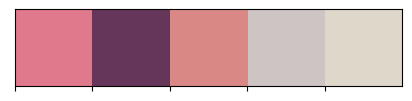

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
import math
from scipy import stats as st
#import geopandas as gpd
import plotly.express as px

#палитра для построения графиков
colors_nude = ['#e0798c','#65365a','#da8886','#cfc4c4','#dfd7ca']
sns.palplot(sns.color_palette(colors_nude))

In [100]:
# Cбросим ограничения на количество выводимых столбцов

pd.set_option('display.max_columns', None)

# Настроим вывод всего текста

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [101]:
#загрузка файлов
checkin_log = pd.read_csv(r'C:\Users\mirra\Desktop\Yandex.praktikum\Пасека\Чистые игры\Данные\cg_checkin_log.csv') 
checkin_type = pd.read_csv(r'C:\Users\mirra\Desktop\Yandex.praktikum\Пасека\Чистые игры\Данные\cg_checkin_type.csv') 
game = pd.read_csv(r'C:\Users\mirra\Desktop\Yandex.praktikum\Пасека\Чистые игры\Данные\cg_game.csv') 
game_event = pd.read_csv(r'C:\Users\mirra\Desktop\Yandex.praktikum\Пасека\Чистые игры\Данные\cg_game_event.csv') 
game_module_item = pd.read_csv(r'C:\Users\mirra\Desktop\Yandex.praktikum\Пасека\Чистые игры\Данные\cg_game_module_item.csv')  
game_participant = pd.read_csv(r'C:\Users\mirra\Desktop\Yandex.praktikum\Пасека\Чистые игры\Данные\cg_game_participant.csv')  
game_point = pd.read_csv(r'C:\Users\mirra\Desktop\Yandex.praktikum\Пасека\Чистые игры\Данные\cg_game_point.csv')  
game_tournament = pd.read_csv(r'C:\Users\mirra\Desktop\Yandex.praktikum\Пасека\Чистые игры\Данные\cg_game_tournament.csv')  
game_transaction = pd.read_csv(r'C:\Users\mirra\Desktop\Yandex.praktikum\Пасека\Чистые игры\Данные\cg_game_transaction.csv')  
game_transaction_item = pd.read_csv(r'C:\Users\mirra\Desktop\Yandex.praktikum\Пасека\Чистые игры\Данные\cg_game_transaction_item.csv') 
city = pd.read_csv(r'C:\Users\mirra\Desktop\Yandex.praktikum\Пасека\Чистые игры\Данные\cg_city.csv')
region =  pd.read_csv(r'C:\Users\mirra\Desktop\Yandex.praktikum\Пасека\Чистые игры\Данные\cg_region.csv')
country = pd.read_csv(r'C:\Users\mirra\Desktop\Yandex.praktikum\Пасека\Чистые игры\Данные\cg_country.csv')

In [102]:
# Выведем необходимые данные с общей информацией по всем датасетам

tables = [game, game_event, game_module_item, game_participant, game_point, game_tournament, 
          game_transaction, game_transaction_item, checkin_log, checkin_type, city, region, country]
names = ['game', 'game_event', 'game_module_item', 'game_participant', 'game_point', 'game_tournament', 
          'game_transaction', 'game_transaction_item', 'checkin_log', 'checkin_type', 'city', 'region', 'country']

for name, table in zip(names, tables):
    print(
        f'\n\033[1;30;46m_____________ДАТАСЕТ:  {name.upper()}_____________\033[0;0m\n',
        '\n\033[2;30;47m Вывод первых строк: \033[0;0m',
        )
    display(table.head(3))
    print('\n\033[2;30;47m Общая информация: \033[0;0m')
    display(table.info(memory_usage='deep'))
    print('\033[2;30;47m Подсчет доли пропусков в %: \033[0;0m')
    display(round(table.isnull().mean() * 100, 2))
    print(
        '\033[2;30;47m Подсчет дубликатов\033[0;0m', 
        '  ', round(table.duplicated().mean() * 100, 4),  ' %'
        )
    print('\n\033[2;30;47m Общая сводка строковых значений: \033[0;0m')
    try:
        display(table.describe(include=['object']).T)
    except:
        print('Датасет не содержит строковых значений')
    print('\n\033[2;30;47m Сводка числовых значений, включая даты: \033[0;0m')
    try:
        display(table.describe(datetime_is_numeric=True).T)
    except:
        print('Датасет не содержит числовых значений')
    print ('\n\033[01;30;46m_____________ОКОНЧАНИЕ ОТЧЕТА ПО ДАТАСЕТУ_____________\033[0;0m\n\n')


_____________ДАТАСЕТ:  GAME_____________
 
 Вывод первых строк: 


,id,kind,status,registrationStatus,purchaseStatus,tag,name,address,vkGroup,description,startTime,finishTime,coordinates,sponsorsNotes,volunteersNotes,specialistsNotes,organizersNotes,maxTeamMembers,createdAt,updatedAt,deletedAt,creatorId,contactId,countryId,regionId,cityId,formatId,rules,showInPublicList,firstInTheCity,isCorporate,customerId,posterId,volunteerCode,organizerCode,posterMiniId,playerCode,lang,approvDate,brandId
0,001a3aa0-6c94-11ea-9e1b-8755c2fc6faf,PASSPORT,finished,opened,closed,school362,cleanOK,"Санкт-Петербург, пр. Витебский, 85, кор 2",https://vk.com/spb362school,В этот раз Чистые Игры проводятся для ученико...,2018-04-28 09:30:00,NaN,"[59.8381, 30.366794]",NaN,NaN,NaN,NaN,6,2020-03-22 23:22:30,2021-04-05 12:23:56,NaN,ffe80710-6c93-11ea-9e1b-8755c2fc6faf,ffe80710-6c93-11ea-9e1b-8755c2fc6faf,e7adb440-c24a-11e9-aaf5-23b334007032,037e7780-90cc-11eb-b723-8be5eed642de,14209d60-c3a6-11e9-9889-17340835102a,big,NaN,1,0,0,NaN,007ca5f0-6c94-11ea-9e1b-8755c2fc6faf,600000,890090,NaN,100000.00,NaN,NaN,NaN
1,00378ba0-edc2-11ea-966b-5747f3919034,NaN,finished,closed,closed,sgt4,Чистые Игры в Сургуте | Купец,Вблизи водной зоны за многопрофильным торговым...,NaN,"<p><span style=""font-size: 13px; font-family: ...",2020-09-19 07:00:49,NaN,"[61.23382539693125, 73.43487654956871]",NaN,NaN,NaN,NaN,4,2020-09-03 08:46:47,2020-09-24 09:10:31,NaN,7e5539b0-baf1-11e9-9e9e-c1c049cd8be3,7e5539b0-baf1-11e9-9e9e-c1c049cd8be3,e7adb440-c24a-11e9-aaf5-23b334007032,514db730-78a7-11e9-b378-b1981a6a7fdc,c8ae4c20-d457-11e9-a892-c312cc6b6a9f,small,<p>1. Перед началом игры проверьте наличие под...,1,0,0,NaN,52ece220-f74d-11ea-af27-45f7c4779037,587039,877129,NaN,112961.00,NaN,NaN,NaN
2,003ff5c0-1f5e-11ea-be17-2f2d6dc19c42,PASSPORT,finished,opened,closed,vyb_cleangames,Чистые игры - Парнас,"Санкт-Петербург, Выборгский район, пос. Парнас...",https://vk.com/vyb_cleangames,18 мая состоится Кубок Чистоты Санкт-Петербург...,2019-05-18 08:00:00,NaN,"[60.07516707, 30.32999601]",NaN,NaN,NaN,NaN,4,2019-12-15 17:11:58,2021-04-05 12:23:56,NaN,78f5a540-baf1-11e9-9e9e-c1c049cd8be3,78f5a540-baf1-11e9-9e9e-c1c049cd8be3,e7adb440-c24a-11e9-aaf5-23b334007032,037e7780-90cc-11eb-b723-8be5eed642de,14209d60-c3a6-11e9-9889-17340835102a,big,NaN,1,0,0,NaN,00be2670-1f5e-11ea-be17-2f2d6dc19c42,599987,890077,NaN,100013.00,NaN,NaN,NaN



 Общая информация: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594 entries, 0 to 1593
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1594 non-null   object 
 1   kind                775 non-null    object 
 2   status              1594 non-null   object 
 3   registrationStatus  1594 non-null   object 
 4   purchaseStatus      1594 non-null   object 
 5   tag                 1594 non-null   object 
 6   name                1594 non-null   object 
 7   address             1460 non-null   object 
 8   vkGroup             611 non-null    object 
 9   description         1491 non-null   object 
 10  startTime           1594 non-null   object 
 11  finishTime          0 non-null      float64
 12  coordinates         1593 non-null   object 
 13  sponsorsNotes       0 non-null      float64
 14  volunteersNotes     0 non-null      float64
 15  specialistsNotes    0 non-null    

None

 Подсчет доли пропусков в %: 


id                     0.00
kind                  51.38
status                 0.00
registrationStatus     0.00
purchaseStatus         0.00
tag                    0.00
name                   0.00
address                8.41
vkGroup               61.67
description            6.46
startTime              0.00
finishTime           100.00
coordinates            0.06
sponsorsNotes        100.00
volunteersNotes      100.00
specialistsNotes     100.00
organizersNotes      100.00
maxTeamMembers         0.00
createdAt              0.00
updatedAt              0.00
deletedAt            100.00
creatorId              0.00
contactId              0.00
countryId              0.00
regionId               5.77
cityId                 5.77
formatId               0.00
rules                 42.72
showInPublicList       0.00
firstInTheCity         0.00
isCorporate            0.00
customerId            96.93
posterId               3.07
volunteerCode          0.00
organizerCode          0.00
posterMiniId        

 Подсчет дубликатов    0.0  %

 Общая сводка строковых значений: 


,count,unique,top,freq
id,1594,1594,001a3aa0-6c94-11ea-9e1b-8755c2fc6faf,1
kind,775,2,PASSPORT,773
status,1594,7,finished,1474
registrationStatus,1594,2,closed,1153
purchaseStatus,1594,2,closed,1585
tag,1594,1594,school362,1
name,1594,1521,Чистый марафон,6
address,1460,1361,улица,12
vkGroup,611,391,https://vk.com/cleangames19,13
description,1491,1400,"<p><span style=""box-sizing: border-box; -webki...",10



 Сводка числовых значений, включая даты: 


,count,mean,std,min,25%,50%,75%,max
finishTime,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sponsorsNotes,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
volunteersNotes,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
specialistsNotes,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
organizersNotes,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
maxTeamMembers,1594.00,5.52,16.20,1.00,4.00,4.00,4.00,500.00
deletedAt,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
showInPublicList,1594.00,0.94,0.25,0.00,1.00,1.00,1.00,1.00
firstInTheCity,1594.00,0.09,0.28,0.00,0.00,0.00,0.00,1.00
isCorporate,1594.00,0.03,0.18,0.00,0.00,0.00,0.00,1.00



_____________ОКОНЧАНИЕ ОТЧЕТА ПО ДАТАСЕТУ_____________



_____________ДАТАСЕТ:  GAME_EVENT_____________
 
 Вывод первых строк: 


,id,type,comment,points,createdAt,updatedAt,deletedAt,gameId,participantId,teamId,status,nonce
0,000093f0-6c9b-11ea-ba39-e33c2f252159,purchase,NaN,5.00,2018-05-06 05:12:42,2020-03-23 00:12:36,NaN,bff884c0-6c9a-11ea-ba39-e33c2f252159,c24f1ef0-6c9a-11ea-ba39-e33c2f252159,c6a559b0-6c9a-11ea-ba39-e33c2f252159,approved,NaN
1,00019880-162f-11ea-8339-b32c0544eb18,purchase,,10.00,2019-04-20 07:54:42,2019-12-04 00:42:50,2019-12-05 16:46:05,e50f5c10-ffea-11e9-bf48-dd54a3e915b6,e7550650-ffea-11e9-bf48-dd54a3e915b6,f20e4650-ffeb-11e9-a376-69753003127f,approved,NaN
2,0001a8e1-183a-11ea-8c29-656e47893f34,checkin,NaN,2.00,2018-07-21 06:57:44,2019-12-06 15:06:37,2019-12-09 13:59:50,9b598ca0-ffed-11e9-9ca8-ed8d50bb71f3,9ec58e70-ffed-11e9-9ca8-ed8d50bb71f3,9ebf9b00-ffed-11e9-9ca8-ed8d50bb71f3,approved,0001a8e0-183a-11ea-8c29-656e47893f34



 Общая информация: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165874 entries, 0 to 165873
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             165874 non-null  object 
 1   type           165874 non-null  object 
 2   comment        39593 non-null   object 
 3   points         165874 non-null  float64
 4   createdAt      165874 non-null  object 
 5   updatedAt      165874 non-null  object 
 6   deletedAt      31213 non-null   object 
 7   gameId         165745 non-null  object 
 8   participantId  165254 non-null  object 
 9   teamId         165874 non-null  object 
 10  status         165874 non-null  object 
 11  nonce          76471 non-null   object 
dtypes: float64(1), object(11)
memory usage: 127.7 MB


None

 Подсчет доли пропусков в %: 


id               0.00
type             0.00
comment         76.13
points           0.00
createdAt        0.00
updatedAt        0.00
deletedAt       81.18
gameId           0.08
participantId    0.37
teamId           0.00
status           0.00
nonce           53.90
dtype: float64

 Подсчет дубликатов    0.0  %

 Общая сводка строковых значений: 


,count,unique,top,freq
id,165874,165874,000093f0-6c9b-11ea-ba39-e33c2f252159,1
type,165874,3,purchase,148360
comment,39593,7896,,19565
createdAt,165874,126662,2019-05-11 06:37:45,45
updatedAt,165874,102790,2019-09-02 18:24:23,312
deletedAt,31213,1840,2020-03-23 00:13:27,381
gameId,165745,1502,3a970aa0-ffed-11e9-9ca8-ed8d50bb71f3,4236
participantId,165254,7729,c92356b0-ffe9-11e9-bf48-dd54a3e915b6,1248
teamId,165874,23922,535e45d0-ffed-11e9-9ca8-ed8d50bb71f3,300
status,165874,3,approved,164237



 Сводка числовых значений, включая даты: 


,count,mean,std,min,25%,50%,75%,max
points,165874.00,146.22,37475.57,-2400000.00,2.00,6.00,13.00,11111111.00



_____________ОКОНЧАНИЕ ОТЧЕТА ПО ДАТАСЕТУ_____________



_____________ДАТАСЕТ:  GAME_MODULE_ITEM_____________
 
 Вывод первых строк: 


,id,dataType,type,group,label,value,weight,units,comment,order,createdAt,updatedAt,deletedAt,gameId
0,0005a710-6951-11eb-b56f-554b73777ed0,number,custom,garbage,1 Маленькая покрышка,2,5.00,POINTS,NaN,12,2021-02-07 14:30:17,2021-02-07 14:30:32,NaN,8d65a430-6d3e-11ea-8afb-234d0fe26ce9
1,0030cfe0-6c94-11ea-9e1b-8755c2fc6faf,number,default,garbage,Mixed garbage,2,7.70,BAGS,Game modules.Default Comment.Mixed garbage,0,2020-03-22 23:22:30,2020-03-22 23:22:31,NaN,001a3aa0-6c94-11ea-9e1b-8755c2fc6faf
2,0030cfe1-6c94-11ea-9e1b-8755c2fc6faf,number,default,garbage,Plastic,7,2.60,BAGS,Game modules.Default Comment.Plastic,0,2020-03-22 23:22:30,2020-03-22 23:22:31,NaN,001a3aa0-6c94-11ea-9e1b-8755c2fc6faf



 Общая информация: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38593 entries, 0 to 38592
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         38593 non-null  object 
 1   dataType   38593 non-null  object 
 2   type       38593 non-null  object 
 3   group      38593 non-null  object 
 4   label      38485 non-null  object 
 5   value      26886 non-null  object 
 6   weight     38593 non-null  float64
 7   units      38593 non-null  object 
 8   comment    22415 non-null  object 
 9   order      38593 non-null  int64  
 10  createdAt  38593 non-null  object 
 11  updatedAt  38593 non-null  object 
 12  deletedAt  305 non-null    object 
 13  gameId     38593 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 32.6 MB


None

 Подсчет доли пропусков в %: 


id           0.00
dataType     0.00
type         0.00
group        0.00
label        0.28
value       30.33
weight       0.00
units        0.00
comment     41.92
order        0.00
createdAt    0.00
updatedAt    0.00
deletedAt   99.21
gameId       0.00
dtype: float64

 Подсчет дубликатов    0.0  %

 Общая сводка строковых значений: 


,count,unique,top,freq
id,38593,38593,0005a710-6951-11eb-b56f-554b73777ed0,1
dataType,38593,2,number,35400
type,38593,2,default,36035
group,38593,7,garbage,14507
label,38485,775,Check-in price,1595
value,26886,62,1,7107
units,38593,4,POINTS,16740
comment,22415,1143,"Не принимается: минеральные отходы (керамика, ...",1423
createdAt,38593,3429,2021-03-30 07:44:36,24
updatedAt,38593,8115,2020-03-24 21:40:57,4392



 Сводка числовых значений, включая даты: 


,count,mean,std,min,25%,50%,75%,max
weight,38593.00,1.60,3.55,0.00,0.00,0.00,1.50,200.00
order,38593.00,0.16,1.10,0.00,0.00,0.00,0.00,20.00



_____________ОКОНЧАНИЕ ОТЧЕТА ПО ДАТАСЕТУ_____________



_____________ДАТАСЕТ:  GAME_PARTICIPANT_____________
 
 Вывод первых строк: 


,id,role,createdAt,updatedAt,deletedAt,userId,gameId,teamId,isBanned,requestedRole
0,00003830-1f5f-11ea-be17-2f2d6dc19c42,player,2019-12-15 17:19:07,2021-03-30 13:51:00,NaN,ffcd6860-1f5e-11ea-be17-2f2d6dc19c42,eb9f6460-1f5e-11ea-be17-2f2d6dc19c42,1a728b50-1f5f-11ea-be17-2f2d6dc19c42,0,NaN
1,0001b1b0-e46d-11e9-a098-83aedc8ab491,player,2019-10-01 17:00:41,2019-10-01 17:00:52,NaN,fcd1a770-e46c-11e9-a344-c7e933260100,cee5c340-e2ab-11e9-91a7-7b08bd29f3c1,ce78a310-e42b-11e9-8a63-3f874e01a7a4,0,NaN
2,000271d0-1860-11ec-a7f4-0bc38c5f63f1,player,2021-09-18 09:08:33,2021-09-18 09:08:33,NaN,d36d5400-185f-11ec-bbad-0f1d13d59826,c0476af0-05b8-11ec-93dc-5d11535ef69f,f6d32c40-17a5-11ec-b05d-ebef7a5e23c0,0,NaN



 Общая информация: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56120 entries, 0 to 56119
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             56120 non-null  object
 1   role           56120 non-null  object
 2   createdAt      56120 non-null  object
 3   updatedAt      56120 non-null  object
 4   deletedAt      106 non-null    object
 5   userId         56120 non-null  object
 6   gameId         56120 non-null  object
 7   teamId         30821 non-null  object
 8   isBanned       56120 non-null  int64 
 9   requestedRole  461 non-null    object
dtypes: int64(1), object(9)
memory usage: 33.8 MB


None

 Подсчет доли пропусков в %: 


id               0.00
role             0.00
createdAt        0.00
updatedAt        0.00
deletedAt       99.81
userId           0.00
gameId           0.00
teamId          45.08
isBanned         0.00
requestedRole   99.18
dtype: float64

 Подсчет дубликатов    0.0  %

 Общая сводка строковых значений: 


,count,unique,top,freq
id,56120,56120,00003830-1f5f-11ea-be17-2f2d6dc19c42,1
role,56120,4,player,45630
createdAt,56120,38565,2019-12-15 17:55:18,12
updatedAt,56120,36036,2021-03-30 13:50:59,3815
deletedAt,106,106,2019-09-20 16:38:13,1
userId,56120,45750,e729b720-c7f0-11e9-b6ba-65c7579c6c38,265
gameId,56120,1594,b9375f90-2328-11eb-81ad-c17c8d681b10,799
teamId,30821,17534,f5a9c8d0-6ca5-11ea-8aeb-2fa00d2cd02f,12
requestedRole,461,2,volunteer,443



 Сводка числовых значений, включая даты: 


,count,mean,std,min,25%,50%,75%,max
isBanned,56120.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00



_____________ОКОНЧАНИЕ ОТЧЕТА ПО ДАТАСЕТУ_____________



_____________ДАТАСЕТ:  GAME_POINT_____________
 
 Вывод первых строк: 


,id,type,location,createdAt,updatedAt,deletedAt,gameId,eventId
0,000dccc0-fffb-11ea-9ff7-f9c847278684,purchase,"{""latitude"": 57.99997447802498, ""longitude"": 5...",2020-09-26 13:20:09,2020-09-26 13:20:09,NaN,11cca020-fd77-11ea-bb09-ed4a6be36c16,NaN
1,0015c510-dc4d-11e9-b69f-f99bd12b9ba0,purchase,"{""latitude"": 60.017529131055454, ""longitude"": ...",2019-09-21 08:51:28,2019-09-21 08:51:28,NaN,ccf00e90-d3d5-11e9-9178-3fe9c4a37f4e,NaN
2,001a5620-fa38-11ea-a107-c5dd70bfed64,garbage_5,"{""latitude"": 55.82565735184906, ""longitude"": 4...",2020-09-19 05:21:41,2020-09-19 05:21:41,NaN,43eff370-edd4-11ea-952d-6bbd60e2dd35,NaN



 Общая информация: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12542 entries, 0 to 12541
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         12542 non-null  object 
 1   type       12542 non-null  object 
 2   location   12542 non-null  object 
 3   createdAt  12542 non-null  object 
 4   updatedAt  12542 non-null  object 
 5   deletedAt  3907 non-null   object 
 6   gameId     12542 non-null  object 
 7   eventId    0 non-null      float64
dtypes: float64(1), object(7)
memory usage: 6.9 MB


None

 Подсчет доли пропусков в %: 


id            0.00
type          0.00
location      0.00
createdAt     0.00
updatedAt     0.00
deletedAt    68.85
gameId        0.00
eventId     100.00
dtype: float64

 Подсчет дубликатов    0.0  %

 Общая сводка строковых значений: 


,count,unique,top,freq
id,12542,12542,000dccc0-fffb-11ea-9ff7-f9c847278684,1
type,12542,6,garbage_5,3279
location,12542,8810,"{""latitude"": 59.90372169056819, ""longitude"": 3...",1443
createdAt,12542,8506,2019-12-15 17:24:22,25
updatedAt,12542,8873,2019-12-15 17:24:22,25
deletedAt,3907,2564,2020-03-23 10:53:55,21
gameId,12542,1594,c0476af0-05b8-11ec-93dc-5d11535ef69f,160



 Сводка числовых значений, включая даты: 


,count,mean,std,min,25%,50%,75%,max
eventId,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN



_____________ОКОНЧАНИЕ ОТЧЕТА ПО ДАТАСЕТУ_____________



_____________ДАТАСЕТ:  GAME_TOURNAMENT_____________
 
 Вывод первых строк: 


,createdAt,updatedAt,tournamentId,gameId
0,2021-02-27 09:36:55,2021-02-27 09:36:55,01a76290-78db-11eb-98fa-0d883377b6db,003ff5c0-1f5e-11ea-be17-2f2d6dc19c42
1,2021-02-27 09:42:28,2021-02-27 09:42:28,01a76290-78db-11eb-98fa-0d883377b6db,023ebec0-6c88-11ea-9d78-6d40f3c9cef6
2,2021-02-27 09:44:57,2021-02-27 09:44:57,01a76290-78db-11eb-98fa-0d883377b6db,05dfff80-1f67-11ea-a416-3195e965c209



 Общая информация: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   createdAt     823 non-null    object
 1   updatedAt     823 non-null    object
 2   tournamentId  823 non-null    object
 3   gameId        823 non-null    object
dtypes: object(4)
memory usage: 271.8 KB


None

 Подсчет доли пропусков в %: 


createdAt      0.00
updatedAt      0.00
tournamentId   0.00
gameId         0.00
dtype: float64

 Подсчет дубликатов    0.0  %

 Общая сводка строковых значений: 


,count,unique,top,freq
createdAt,823,179,2019-09-24 21:49:03,69
updatedAt,823,179,2019-09-24 21:49:03,69
tournamentId,823,41,38ab6620-0714-11ec-a685-6b707bba20f4,97
gameId,823,673,eb7cd680-d3d6-11e9-9178-3fe9c4a37f4e,4



 Сводка числовых значений, включая даты: 


,count,unique,top,freq
createdAt,823,179,2019-09-24 21:49:03,69
updatedAt,823,179,2019-09-24 21:49:03,69
tournamentId,823,41,38ab6620-0714-11ec-a685-6b707bba20f4,97
gameId,823,673,eb7cd680-d3d6-11e9-9178-3fe9c4a37f4e,4



_____________ОКОНЧАНИЕ ОТЧЕТА ПО ДАТАСЕТУ_____________



_____________ДАТАСЕТ:  GAME_TRANSACTION_____________
 
 Вывод первых строк: 


,id,direction,sum,comment,createdAt,updatedAt,deletedAt,gameId,participantId,teamId,eventId
0,0000bff0-6d28-11ea-9894-db36c7fcea0b,incoming,5.00,,2020-03-23 17:01:55,2020-03-23 17:01:55,NaN,8c673e70-6d27-11ea-9894-db36c7fcea0b,91f499a0-6d27-11ea-9894-db36c7fcea0b,b14bfa00-6d27-11ea-9894-db36c7fcea0b,ffe91940-6d27-11ea-9894-db36c7fcea0b
1,00011a30-1a8b-11ea-bce2-efb3605dd4a3,incoming,5.00,NaN,2019-12-09 13:51:29,2019-12-09 13:51:29,2020-03-22 23:28:38,3a970aa0-ffed-11e9-9ca8-ed8d50bb71f3,3db86ee0-ffed-11e9-9ca8-ed8d50bb71f3,535e45d0-ffed-11e9-9ca8-ed8d50bb71f3,ffea36d0-1a8a-11ea-bce2-efb3605dd4a3
2,00012940-1e04-11ea-b69a-b9d0febe8303,incoming,2.00,,2019-12-13 23:55:11,2019-12-13 23:55:11,NaN,2f838450-1df6-11ea-b042-fd5060702b1f,31bd20a0-1df6-11ea-b042-fd5060702b1f,0f7778f0-1e01-11ea-820b-05fba9f795a4,ffe786c0-1e03-11ea-b69a-b9d0febe8303



 Общая информация: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167966 entries, 0 to 167965
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             167966 non-null  object 
 1   direction      167966 non-null  object 
 2   sum            167966 non-null  float64
 3   comment        39975 non-null   object 
 4   createdAt      167966 non-null  object 
 5   updatedAt      167966 non-null  object 
 6   deletedAt      34573 non-null   object 
 7   gameId         167835 non-null  object 
 8   participantId  167296 non-null  object 
 9   teamId         167966 non-null  object 
 10  eventId        167891 non-null  object 
dtypes: float64(1), object(10)
memory usage: 124.3 MB


None

 Подсчет доли пропусков в %: 


id               0.00
direction        0.00
sum              0.00
comment         76.20
createdAt        0.00
updatedAt        0.00
deletedAt       79.42
gameId           0.08
participantId    0.40
teamId           0.00
eventId          0.04
dtype: float64

 Подсчет дубликатов    0.0  %

 Общая сводка строковых значений: 


,count,unique,top,freq
id,167966,167966,0000bff0-6d28-11ea-9894-db36c7fcea0b,1
direction,167966,1,incoming,167966
comment,39975,7639,,19593
createdAt,167966,105951,2019-12-05 16:36:15,6
updatedAt,167966,103983,2019-12-05 16:36:17,6
deletedAt,34573,5357,2019-12-05 17:36:00,378
gameId,167835,1501,3a970aa0-ffed-11e9-9ca8-ed8d50bb71f3,4236
participantId,167296,7532,c92356b0-ffe9-11e9-bf48-dd54a3e915b6,1248
teamId,167966,23910,d2ecfc00-ffe9-11e9-bf48-dd54a3e915b6,300
eventId,167891,164236,32b0d390-0b84-11eb-8652-bbc327745198,12



 Сводка числовых значений, включая даты: 


,count,mean,std,min,25%,50%,75%,max
sum,167966.00,145.38,37241.46,-2400000.00,2.00,6.00,14.00,11111111.00



_____________ОКОНЧАНИЕ ОТЧЕТА ПО ДАТАСЕТУ_____________



_____________ДАТАСЕТ:  GAME_TRANSACTION_ITEM_____________
 
 Вывод первых строк: 


,quantity,bags,weight,points,units,createdAt,updatedAt,deletedAt,itemId,transactionId
0,4.00,0.00,20.00,8.00,POINTS,2021-02-07 14:32:06,2021-02-07 14:32:06,NaN,0005a710-6951-11eb-b56f-554b73777ed0,40e63bf0-6951-11eb-9a73-31f8c554ef25
1,4.00,2.00,20.00,8.00,POINTS,2021-02-07 14:33:03,2021-02-07 14:33:03,NaN,0005a710-6951-11eb-b56f-554b73777ed0,62fd7fa0-6951-11eb-8c8b-33c7665e055a
2,2.00,0.00,20.00,4.00,POINTS,2021-02-07 14:35:57,2021-02-07 14:35:57,NaN,0005a710-6951-11eb-b56f-554b73777ed0,ca8c1e60-6951-11eb-96a9-3bc4c0996806



 Общая информация: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256870 entries, 0 to 256869
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity       256870 non-null  float64
 1   bags           256870 non-null  float64
 2   weight         256870 non-null  float64
 3   points         256870 non-null  float64
 4   units          256870 non-null  object 
 5   createdAt      256870 non-null  object 
 6   updatedAt      256870 non-null  object 
 7   deletedAt      0 non-null       float64
 8   itemId         256870 non-null  object 
 9   transactionId  256870 non-null  object 
dtypes: float64(5), object(5)
memory usage: 107.7 MB


None

 Подсчет доли пропусков в %: 


quantity          0.00
bags              0.00
weight            0.00
points            0.00
units             0.00
createdAt         0.00
updatedAt         0.00
deletedAt       100.00
itemId            0.00
transactionId     0.00
dtype: float64

 Подсчет дубликатов    0.0  %

 Общая сводка строковых значений: 


,count,unique,top,freq
units,256870,4,BAGS,194334
createdAt,256870,101306,2019-12-15 20:11:13,19
updatedAt,256870,101306,2019-12-15 20:11:13,19
itemId,256870,11125,c66213d3-ffe9-11e9-bf48-dd54a3e915b6,1488
transactionId,256870,148963,89148c60-203a-11ec-b782-49b2423d2fdd,19



 Сводка числовых значений, включая даты: 


,count,mean,std,min,25%,50%,75%,max
quantity,256870.00,87.27,29969.95,-2400000.00,1.00,1.00,2.50,11111111.00
bags,256870.00,2.66,323.89,-20700.00,0.00,1.00,2.00,100000.00
weight,256870.00,15.55,1004.37,-1155.00,0.00,6.40,11.70,350000.00
points,256870.00,95.01,30068.31,-2400000.00,3.00,5.00,9.00,11111111.00
deletedAt,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN



_____________ОКОНЧАНИЕ ОТЧЕТА ПО ДАТАСЕТУ_____________



_____________ДАТАСЕТ:  CHECKIN_LOG_____________
 
 Вывод первых строк: 


,id,snapshot,createdAt,updatedAt,checkinId
0,09628310-921d-11eb-9e83-7bcc5930bcfa,"{""user"": {""id"": ""a6138000-b90d-11e9-9b28-cfc5a...",2021-03-31 12:31:37,2021-03-31 12:31:37,70c9dad0-9209-11eb-bd6c-7355a49d3341
1,1058d430-9209-11eb-93c9-b5c59851414e,"{""user"": {""id"": ""a6138000-b90d-11e9-9b28-cfc5a...",2021-03-31 10:08:39,2021-03-31 10:08:39,dfcf4ab0-9208-11eb-9650-1f731cd3f8fc
2,11b47b50-9e38-11eb-ba15-f96ee5b9e583,"{""user"": {""id"": ""a6138000-b90d-11e9-9b28-cfc5a...",2021-04-15 22:15:21,2021-04-15 22:15:21,354e2b30-9e36-11eb-bd9b-0f6bc78a2219



 Общая информация: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         24 non-null     object
 1   snapshot   24 non-null     object
 2   createdAt  24 non-null     object
 3   updatedAt  24 non-null     object
 4   checkinId  24 non-null     object
dtypes: object(5)
memory usage: 15.0 KB


None

 Подсчет доли пропусков в %: 


id          0.00
snapshot    0.00
createdAt   0.00
updatedAt   0.00
checkinId   0.00
dtype: float64

 Подсчет дубликатов    0.0  %

 Общая сводка строковых значений: 


,count,unique,top,freq
id,24,24,09628310-921d-11eb-9e83-7bcc5930bcfa,1
snapshot,24,12,"{""user"": {""id"": ""a6138000-b90d-11e9-9b28-cfc5a...",13
createdAt,24,24,2021-03-31 12:31:37,1
updatedAt,24,24,2021-03-31 12:31:37,1
checkinId,24,19,70c9dad0-9209-11eb-bd6c-7355a49d3341,2



 Сводка числовых значений, включая даты: 


,count,unique,top,freq
id,24,24,09628310-921d-11eb-9e83-7bcc5930bcfa,1
snapshot,24,12,"{""user"": {""id"": ""a6138000-b90d-11e9-9b28-cfc5a...",13
createdAt,24,24,2021-03-31 12:31:37,1
updatedAt,24,24,2021-03-31 12:31:37,1
checkinId,24,19,70c9dad0-9209-11eb-bd6c-7355a49d3341,2



_____________ОКОНЧАНИЕ ОТЧЕТА ПО ДАТАСЕТУ_____________



_____________ДАТАСЕТ:  CHECKIN_TYPE_____________
 
 Вывод первых строк: 


,id,type,checkinId
0,00a8eb70-28fd-11ec-8603-5bdb408eff02,HOUSEHOLD_WASTE,0097fb80-28fd-11ec-8603-5bdb408eff02
1,00c50320-a03e-11eb-ab3b-c715d621ece0,HOUSEHOLD_WASTE,00b54bb0-a03e-11eb-ab3b-c715d621ece0
2,01fbdc80-97da-11eb-a771-d39a8ea786bf,ELECTRONICS,01f65e40-97da-11eb-a771-d39a8ea786bf



 Общая информация: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         536 non-null    object
 1   type       536 non-null    object
 2   checkinId  536 non-null    object
dtypes: object(3)
memory usage: 134.0 KB


None

 Подсчет доли пропусков в %: 


id          0.00
type        0.00
checkinId   0.00
dtype: float64

 Подсчет дубликатов    0.0  %

 Общая сводка строковых значений: 


,count,unique,top,freq
id,536,536,00a8eb70-28fd-11ec-8603-5bdb408eff02,1
type,536,7,HOUSEHOLD_WASTE,296
checkinId,536,415,a904add0-a4c9-11eb-9bd8-970fb78d616b,6



 Сводка числовых значений, включая даты: 


,count,unique,top,freq
id,536,536,00a8eb70-28fd-11ec-8603-5bdb408eff02,1
type,536,7,HOUSEHOLD_WASTE,296
checkinId,536,415,a904add0-a4c9-11eb-9bd8-970fb78d616b,6



_____________ОКОНЧАНИЕ ОТЧЕТА ПО ДАТАСЕТУ_____________



_____________ДАТАСЕТ:  CITY_____________
 
 Вывод первых строк: 


,id,name,createdAt,updatedAt,deletedAt
0,0000e420-9f5f-11eb-8a8e-afe351be9140,пгт Уральский,2021-04-17 09:26:33,2021-04-17 09:26:33,NaN
1,000bc4b0-cff1-11e9-932c-2d9bcaabcd3f,Новокузнецк,2019-09-05 15:22:40,2019-09-05 15:22:40,NaN
2,000c7ce0-9f5f-11eb-8a8e-afe351be9140,поселок Уральский,2021-04-17 09:26:33,2021-04-17 09:26:33,NaN



 Общая информация: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4698 entries, 0 to 4697
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         4698 non-null   object 
 1   name       4698 non-null   object 
 2   createdAt  4698 non-null   object 
 3   updatedAt  4698 non-null   object 
 4   deletedAt  0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 1.6 MB


None

 Подсчет доли пропусков в %: 


id            0.00
name          0.00
createdAt     0.00
updatedAt     0.00
deletedAt   100.00
dtype: float64

 Подсчет дубликатов    0.0  %

 Общая сводка строковых значений: 


,count,unique,top,freq
id,4698,4698,0000e420-9f5f-11eb-8a8e-afe351be9140,1
name,4698,4668,г Кронштадт,9
createdAt,4698,1454,2019-05-17 13:26:00,32
updatedAt,4698,1454,2019-05-17 13:26:00,32



 Сводка числовых значений, включая даты: 


,count,mean,std,min,25%,50%,75%,max
deletedAt,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN



_____________ОКОНЧАНИЕ ОТЧЕТА ПО ДАТАСЕТУ_____________



_____________ДАТАСЕТ:  REGION_____________
 
 Вывод первых строк: 


,id,name,createdAt,updatedAt,deletedAt
0,023ac450-c50b-11eb-b0a4-a1e717d9f35b,Томская обл,2021-06-04 08:01:03,2021-06-04 08:01:03,NaN
1,023bfcd0-c50b-11eb-b0a4-a1e717d9f35b,Томская обл,2021-06-04 08:01:03,2021-06-04 08:01:03,NaN
2,02514280-9387-11eb-a33e-ed02618d6ad8,Респ Татарстан,2021-04-02 07:42:43,2021-04-02 07:42:43,NaN



 Общая информация: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         139 non-null    object 
 1   name       139 non-null    object 
 2   createdAt  139 non-null    object 
 3   updatedAt  139 non-null    object 
 4   deletedAt  0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 50.2 KB


None

 Подсчет доли пропусков в %: 


id            0.00
name          0.00
createdAt     0.00
updatedAt     0.00
deletedAt   100.00
dtype: float64

 Подсчет дубликатов    0.0  %

 Общая сводка строковых значений: 


,count,unique,top,freq
id,139,139,023ac450-c50b-11eb-b0a4-a1e717d9f35b,1
name,139,132,Московская обл,3
createdAt,139,40,2019-05-17 13:26:01,33
updatedAt,139,40,2019-05-17 13:26:01,33



 Сводка числовых значений, включая даты: 


,count,mean,std,min,25%,50%,75%,max
deletedAt,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN



_____________ОКОНЧАНИЕ ОТЧЕТА ПО ДАТАСЕТУ_____________



_____________ДАТАСЕТ:  COUNTRY_____________
 
 Вывод первых строк: 


,id,code,name,createdAt,updatedAt,deletedAt
0,e6466d80-c24a-11e9-aaf5-23b334007032,TX,Togo,2020-12-03 22:25:52,2020-12-03 22:25:53,NaN
1,e6476d80-c24a-11e9-aaf5-23b334007032,AF,"Afghanistan, افغانستان",2019-08-19 06:30:55,2019-08-19 06:30:55,NaN
2,e64bda50-c24a-11e9-aaf5-23b334007032,AL,"Albania, Shqipëria",2019-08-19 06:30:55,2019-08-19 06:30:55,NaN



 Общая информация: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         242 non-null    object 
 1   code       241 non-null    object 
 2   name       242 non-null    object 
 3   createdAt  242 non-null    object 
 4   updatedAt  242 non-null    object 
 5   deletedAt  0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 97.0 KB


None

 Подсчет доли пропусков в %: 


id            0.00
code          0.41
name          0.00
createdAt     0.00
updatedAt     0.00
deletedAt   100.00
dtype: float64

 Подсчет дубликатов    0.0  %

 Общая сводка строковых значений: 


,count,unique,top,freq
id,242,242,e6466d80-c24a-11e9-aaf5-23b334007032,1
code,241,241,TX,1
name,242,241,Congo,2
createdAt,242,5,2019-08-19 06:30:57,111
updatedAt,242,5,2019-08-19 06:30:57,111



 Сводка числовых значений, включая даты: 


,count,mean,std,min,25%,50%,75%,max
deletedAt,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN



_____________ОКОНЧАНИЕ ОТЧЕТА ПО ДАТАСЕТУ_____________




# Этап 2: Предобработка данных

#### 1.1 DF: checkin_log

- Чекин - это фото-отметка с приложенной геолокацией. 
- Это фотографии территории ДО уборки И после (т.е. 2 фотографии), прикреплённые к определённой точке на карте.
- snapshot - снимок, подтвержденный организатором после уборки

In [103]:
checkin_log['createdAt'] = pd.to_datetime(checkin_log['createdAt']).dt.date

In [104]:
checkin_log['createdAt'].value_counts()

2021-04-07    9
2021-03-31    7
2021-04-15    5
2021-12-08    2
2021-08-28    1
Name: createdAt, dtype: int64

#### 1.2 DF: checkin_type

- Чекин - это фото-отметка с приложенной геолокацией. 
- Это фотографии территории ДО уборки И после (т.е. 2 фотографии), прикреплённые к определённой точке на карте.

In [265]:
checkin_type['type'].value_counts()

HOUSEHOLD_WASTE         296
DUMP                     80
CONSTRUCTION_GARBAGE     53
TIRES                    45
LARGE_DEBRIS             33
HAZARDOUS_WASTE          17
ELECTRONICS              12
Name: type, dtype: int64

In [264]:
checkin = checkin_type.merge(checkin_log, on='checkinId', how='outer')

#### 1.3 DF: game

In [107]:
game.isna().any()

id                    False
kind                   True
status                False
registrationStatus    False
purchaseStatus        False
tag                   False
name                  False
address                True
vkGroup                True
description            True
startTime             False
finishTime             True
coordinates            True
sponsorsNotes          True
volunteersNotes        True
specialistsNotes       True
organizersNotes        True
maxTeamMembers        False
createdAt             False
updatedAt             False
deletedAt              True
creatorId             False
contactId             False
countryId             False
regionId               True
cityId                 True
formatId              False
rules                  True
showInPublicList      False
firstInTheCity        False
isCorporate           False
customerId             True
posterId               True
volunteerCode         False
organizerCode         False
posterMiniId        

In [108]:
game.duplicated().any()

False

In [109]:
# Для удобства объединения, переименовываем колонку id
game = game.rename(columns={'id':'gameId', 'name':'game_name'})
game['gameId'].count() #количество проведенных игр за весь период

1594

In [110]:
game['game_name'] = game['game_name'].str.replace('Чистые игры', 'Чистые Игры')
game['game_name'].value_counts().head(10)

Чистые Игры                                 10
Чистый марафон                               6
Экоквест в рамках экомарафона Понеслось!     4
Чистые Игры в Тынде                          4
Чистые Игры в Онеге                          3
Чистые Игры в Ярушкинском дендропарке        3
Чистые Игры. Первоуральск                    3
Чистые Игры в Лужском районе                 3
Чистые Игры Белово                           3
Чистый Каспий                                3
Name: game_name, dtype: int64

In [111]:
# Преобразуем колонку с датой начала игр
game['startTime'] = pd.to_datetime(game['startTime']).dt.date
game['game_year'] = pd.to_datetime(game['startTime']).dt.year
game['game_month'] = pd.to_datetime(game['startTime']).dt.month
game['game_weekday'] = pd.to_datetime(game['startTime']).dt.weekday

#### 1.4 DF: game_event

In [112]:
game_event.isna().any()

id               False
type             False
comment           True
points           False
createdAt        False
updatedAt        False
deletedAt         True
gameId            True
participantId     True
teamId           False
status           False
nonce             True
dtype: bool

In [113]:
game_event['type'].value_counts()

purchase     148360
checkin       15209
photohunt      2305
Name: type, dtype: int64

#### 1.5 DF: game_module_item

In [114]:
game_module_item['dataType'].value_counts()

number      35400
checkbox     3193
Name: dataType, dtype: int64

In [115]:
game_module_item['type'].value_counts()

default    36035
custom      2558
Name: type, dtype: int64

In [116]:
# В колонке содержатся данные по активностям во время игр (фотоохота, загадки)
game_module_item['group'].value_counts()

garbage            14507
inventory-sales     8269
checkins            6375
artifacts           4652
photohunt           3188
correction          1596
riddles                6
Name: group, dtype: int64

In [117]:
game_module_item['label'].value_counts().head(20)

Check-in price                 1595
Photohunt price                1594
Add check-ins to the game      1594
Net                            1594
Add photos to the game         1594
Shovel                         1594
Rake                           1594
Truck                          1594
Correction                     1594
Stretcher                      1594
Check-in repost price          1594
Mixed garbage                  1594
Big garbage                    1594
Cans                           1594
Batteries                      1594
Glass                          1594
Metal                          1594
Plastic                        1594
Max points for one artifact    1594
Photohunt repost price         1592
Name: label, dtype: int64

In [118]:
game_module_item['units'].value_counts()

POINTS       16740
PEACES       11539
BAGS         10043
KILOGRAMS      271
Name: units, dtype: int64

In [119]:
# Для удобства объединения, переименовываем колонку id
game_module_item = game_module_item.rename(columns={'id':'itemId'})

In [120]:
game_module_item['weight'].sum()

61665.44

In [121]:
game_module_item.groupby('group')['weight'].sum()

group
artifacts             0.00
checkins              0.00
correction            0.00
garbage           61665.44
inventory-sales       0.00
photohunt             0.00
riddles               0.00
Name: weight, dtype: float64

#### 1.6 DF: game_participant

In [122]:
game_participant['role'].value_counts()

player       45630
volunteer     5234
moderator     3134
admin         2122
Name: role, dtype: int64

In [123]:
game_participant['isBanned'].value_counts()

0    56120
Name: isBanned, dtype: int64

In [124]:
# Для удобства объединения, переименовываем колонку id
game_participant = game_participant.rename(columns={'id':'participantId'})
game_participant['participantId'].count()

56120

#### 1.7 DF: game_point

In [125]:
game_point['type'].value_counts()

garbage_5     3279
basecamp      2645
game          2639
purchase      1818
garbage_15    1430
garbage_30     731
Name: type, dtype: int64

#### 1.8 DF: game_tournament

#### 1.9 DF: game_transaction

- transactions входит в events
- sum - это сумма баллов/очков у участника за собранный мусор

#### 1.10 DF: game_transaction_item

In [126]:
game_transaction_item['weight'].sum()

3994498.1

#### 1.11 DF: city

In [127]:
#для удобства объединения с таблицей game, переименовываем колонку id
city = city.rename(columns={'id':'cityId', 'name': 'city_name'})

In [128]:
def city_type(row):
    city = row['city_name']
    #world = ['поселок', 'деревня', 'село', 'хутор', 'тер.']
    if 'поселок' in city:
        return 'поселок'
    elif 'деревня' in city:
        return 'деревня'
    elif 'село' in city:
        return 'село'
    elif 'хутор' in city:
        return 'хутор'
    elif 'тер. СНТ' in city:
        return 'садоводческое некоммерческое товарищество'
    elif 'пгт' in city:
        return 'поселок городского типа'
    elif 'рп' in city:
        return 'рабочий поселок'
    elif 'дп' in city:
        return 'дачный поселок'
    else:
        return 'город'

    
city['city_type'] = city.apply(city_type, axis=1)    

In [129]:
#корректируем названия локаций
city['city_name'] = city['city_name'].str.replace('г ', '')
city['city_name'] = city['city_name'].str.replace('село ', '')
city['city_name'] = city['city_name'].str.replace('деревня ', '')
city['city_name'] = city['city_name'].str.replace('хутор ', '')
city['city_name'] = city['city_name'].str.replace('пгт ', '')
city['city_name'] = city['city_name'].str.replace('поселок ', '')
city['city_name'] = city['city_name'].str.replace('тер ', '')
city['city_name'] = city['city_name'].str.replace('тер. СНТ ', '')
city['city_name'] = city['city_name'].str.replace('рп ', '')
city['city_name'] = city['city_name'].str.replace('дп ', '')

#удаляем пробелы
city['city_name'] = city['city_name'].str.strip()

C:\Users\mirra\AppData\Local\Temp\ipykernel_12824\2162696164.py:9: FutureWarning:

The default value of regex will change from True to False in a future version.



#### 1.12 DF: country

In [130]:
#для удобства объединения с таблицей game, переименовываем колонку id
country = country.rename(columns={'id':'countryId', 'name': 'country_name'})

In [131]:
#для удобства оставляем в таблице только первое название страны на английском
country['country_name'] = country['country_name'].apply(lambda x: x.split(',')[0])

#### 1.12 DF: region

In [132]:
#для удобства объединения с таблицей game, переименовываем колонку id
region = region.rename(columns={'id':'regionId', 'name': 'region_name'})
#region = region.rename(columns={'id':'regionId'})

In [133]:
#в названиях есть неточности (например, обл. и область), из-за этого возникли повторы 
region['region_name'].value_counts().head(10)

Московская обл                              3
Курганская обл                              2
Оренбургская обл                            2
Томская обл                                 2
Белгородская обл                            2
Курская обл                                 2
Ханты-Мансийский автономный округ - Югра    1
Еврейская автономная область                1
Ярославская область                         1
Забайкальский край                          1
Name: region_name, dtype: int64

In [134]:
region['region_name'] = region['region_name'].str.replace(' область', '')
region['region_name'] = region['region_name'].str.replace(' обл', '')
region['region_name'] = region['region_name'].str.replace('Республика ', '')
region['region_name'] = region['region_name'].str.replace(' Республика', '')
region['region_name'] = region['region_name'].str.replace(' Респ', '')
region['region_name'] = region['region_name'].str.replace('Респ ', '')
region['region_name'] = region['region_name'].str.replace('г Санкт-Петербург', 'Санкт-Петербург и Лен.область')
region['region_name'] = region['region_name'].str.replace('Ленинградская', 'Санкт-Петербург и Лен.область')
region['region_name'] = region['region_name'].str.replace('г Москва', 'Москва и Мос.область')
region['region_name'] = region['region_name'].str.replace('Московская', 'Москва и Мос.область')
region['region_name'] = region['region_name'].str.replace('автономный округ', 'АО')

#удаляем пробелы
region['region_name'] = region['region_name'].str.strip()

region.head()

,regionId,region_name,createdAt,updatedAt,deletedAt
0,023ac450-c50b-11eb-b0a4-a1e717d9f35b,Томская,2021-06-04 08:01:03,2021-06-04 08:01:03,NaN
1,023bfcd0-c50b-11eb-b0a4-a1e717d9f35b,Томская,2021-06-04 08:01:03,2021-06-04 08:01:03,NaN
2,02514280-9387-11eb-a33e-ed02618d6ad8,Татарстан,2021-04-02 07:42:43,2021-04-02 07:42:43,NaN
3,03311b30-9387-11eb-a33e-ed02618d6ad8,Ямало-Ненецкий АО,2021-04-02 07:42:44,2021-04-02 07:42:44,NaN
4,037e7780-90cc-11eb-b723-8be5eed642de,Санкт-Петербург и Лен.область,2021-03-29 20:19:07,2021-03-29 20:19:07,NaN


In [135]:
region['region_name'].unique()

array(['Томская', 'Татарстан', 'Ямало-Ненецкий АО',
       'Санкт-Петербург и Лен.область', 'Чеченская', 'Новгородская',
       'Мурманская', 'Крым', 'Калужская', 'Курская', 'Курганская',
       'Смоленская', 'Воронежская', 'Омская', 'Тюменская', 'Костромская',
       'Оренбургская', 'Адыгея', 'Тульская', 'Москва и Мос.область',
       'Нижегородская', 'Башкортостан', 'Псковская', 'Брянская',
       'Кировская', 'Тверская', 'Новосибирская', 'Свердловская',
       'Адыгея (Адыгея)', 'Бурятия', 'Алтай', 'Дагестан', 'Ингушетия',
       'Кабардино-Балкарская', 'Калмыкия', 'Карачаево-Черкесская',
       'Карелия', 'Коми', 'Марий Эл', 'Мордовия', 'Саха (Якутия)',
       'Северная Осетия - Алания', 'Тыва', 'Удмуртская', 'Хакасия',
       'Чувашская - Чувашия', 'Алтайский край', 'Краснодарский край',
       'Красноярский край', 'Приморский край', 'Ставропольский край',
       'Хабаровский край', 'Амурская', 'Архангельская', 'Астраханская',
       'Белгородская', 'Владимирская', 'Волгоградская'

<hr style="border: 2px solid green;" />

## Этап 3: Исследовательский анализ данных

**1. Описательные статистики игр и команд:**

- 1.1 География Чистых игр
- 1.2 Сезонность
- 1.3 Размеры команд 
- 1.4 Количество участников и формат Чистых Игр
- 1.5 Количество команд за одну игру

На какие вопросы отвечаем:
- визуализируем географию игр по координатам на карте мира;
- рассмотрим распределение количества игр по странам;
- рассмотрим распределение количества игр по городам;
- рассмотрим распределение количества игр по регионам;
- рассмотрим сезонность чистых игр (по годам, месяцам и дням недели);
- рассмотрим какие команды по количеству участников встречаются чаще всего;
- рассмотрим какие форматы игр проводятся и проанализируем их;
- рассмотрим в каких субъектах РФ и городах какие по формату Чистые игры проводятся.

**2. Чистые Игры по активностям (срезы по городам, регионам и играм)**

- 2.1 Артефакты
- 2.2 Фотоохота

На какие вопросы отвечаем:
- рассмотрим, на каких играх собирают больше всего артефактов и где (в каких городах, субъектах РФ)
- рассмотрим, на каких играх чаще делают фотоохоту (в каких городах, субъектах РФ)

**3. Критерии команды, способствующие победе в чистых играх**

На какие вопросы отвечаем:
- рассмотрим, на каких играх участники получили больше всего очков;
- рассмотрим, какие команды получили больше всего очков;
- рассмотрим, команды какого размера более эффективны (т.е. собирают наибольшее количество очков);
- [хорошо бы рассмотреть, какие команды по категории наиболее эффективны. Будет здорово, если заказчик поделится таблицей]

**4. Какие игры привлекают наибольшее число участников**

### 1.1 География Читстых Игр

In [136]:
# Добавляем в таблицу game колонки с долготой и широтой (на основании колонки coordinates), для построения карты

game['coordinates'] = game['coordinates'].astype('str')

#широта latitude 
game['latitude'] = (
    game['coordinates'].apply(lambda x: x.split(',')[0])
    .apply(lambda x: x[1:])
    .str.strip()
    .replace('null','0')
    .replace('an','0')
    .replace('na','0')
    .astype('float')
)

#долгота longitude
game['longitude'] = (
    game['coordinates'].apply(lambda x: x.split(',')[-1])
    .apply(lambda x: x[:-1])
    .str.strip()
    .replace('null','0')
    .replace('an','0')
    .replace('na','0')
    .astype('float')
)
game.head(2)

,gameId,kind,status,registrationStatus,purchaseStatus,tag,game_name,address,vkGroup,description,startTime,finishTime,coordinates,sponsorsNotes,volunteersNotes,specialistsNotes,organizersNotes,maxTeamMembers,createdAt,updatedAt,deletedAt,creatorId,contactId,countryId,regionId,cityId,formatId,rules,showInPublicList,firstInTheCity,isCorporate,customerId,posterId,volunteerCode,organizerCode,posterMiniId,playerCode,lang,approvDate,brandId,game_year,game_month,game_weekday,latitude,longitude
0,001a3aa0-6c94-11ea-9e1b-8755c2fc6faf,PASSPORT,finished,opened,closed,school362,cleanOK,"Санкт-Петербург, пр. Витебский, 85, кор 2",https://vk.com/spb362school,В этот раз Чистые Игры проводятся для ученико...,2018-04-28,NaN,"[59.8381, 30.366794]",NaN,NaN,NaN,NaN,6,2020-03-22 23:22:30,2021-04-05 12:23:56,NaN,ffe80710-6c93-11ea-9e1b-8755c2fc6faf,ffe80710-6c93-11ea-9e1b-8755c2fc6faf,e7adb440-c24a-11e9-aaf5-23b334007032,037e7780-90cc-11eb-b723-8be5eed642de,14209d60-c3a6-11e9-9889-17340835102a,big,NaN,1,0,0,NaN,007ca5f0-6c94-11ea-9e1b-8755c2fc6faf,600000,890090,NaN,100000.00,NaN,NaN,NaN,2018,4,5,59.84,30.37
1,00378ba0-edc2-11ea-966b-5747f3919034,NaN,finished,closed,closed,sgt4,Чистые Игры в Сургуте | Купец,Вблизи водной зоны за многопрофильным торговым...,NaN,"<p><span style=""font-size: 13px; font-family: ...",2020-09-19,NaN,"[61.23382539693125, 73.43487654956871]",NaN,NaN,NaN,NaN,4,2020-09-03 08:46:47,2020-09-24 09:10:31,NaN,7e5539b0-baf1-11e9-9e9e-c1c049cd8be3,7e5539b0-baf1-11e9-9e9e-c1c049cd8be3,e7adb440-c24a-11e9-aaf5-23b334007032,514db730-78a7-11e9-b378-b1981a6a7fdc,c8ae4c20-d457-11e9-a892-c312cc6b6a9f,small,<p>1. Перед началом игры проверьте наличие под...,1,0,0,NaN,52ece220-f74d-11ea-af27-45f7c4779037,587039,877129,NaN,112961.00,NaN,NaN,NaN,2020,9,5,61.23,73.43


In [137]:
# Строим карту с визуализацией всех точек, где проводились игры
fig = px.scatter_mapbox(game, lon='longitude', lat='latitude', hover_name='coordinates', zoom=11)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show();

In [138]:
# Присоединяем к game таблицы с данными о городах, странах и регионах
game = game.merge(city[['cityId', 'city_name', 'city_type']], on='cityId', how='left')
game = game.merge(country[['countryId', 'country_name']], on='countryId', how='left')
game = game.merge(region[['regionId', 'region_name']], on='regionId', how='left')
game.head(2)

,gameId,kind,status,registrationStatus,purchaseStatus,tag,game_name,address,vkGroup,description,startTime,finishTime,coordinates,sponsorsNotes,volunteersNotes,specialistsNotes,organizersNotes,maxTeamMembers,createdAt,updatedAt,deletedAt,creatorId,contactId,countryId,regionId,cityId,formatId,rules,showInPublicList,firstInTheCity,isCorporate,customerId,posterId,volunteerCode,organizerCode,posterMiniId,playerCode,lang,approvDate,brandId,game_year,game_month,game_weekday,latitude,longitude,city_name,city_type,country_name,region_name
0,001a3aa0-6c94-11ea-9e1b-8755c2fc6faf,PASSPORT,finished,opened,closed,school362,cleanOK,"Санкт-Петербург, пр. Витебский, 85, кор 2",https://vk.com/spb362school,В этот раз Чистые Игры проводятся для ученико...,2018-04-28,NaN,"[59.8381, 30.366794]",NaN,NaN,NaN,NaN,6,2020-03-22 23:22:30,2021-04-05 12:23:56,NaN,ffe80710-6c93-11ea-9e1b-8755c2fc6faf,ffe80710-6c93-11ea-9e1b-8755c2fc6faf,e7adb440-c24a-11e9-aaf5-23b334007032,037e7780-90cc-11eb-b723-8be5eed642de,14209d60-c3a6-11e9-9889-17340835102a,big,NaN,1,0,0,NaN,007ca5f0-6c94-11ea-9e1b-8755c2fc6faf,600000,890090,NaN,100000.00,NaN,NaN,NaN,2018,4,5,59.84,30.37,Санкт-Петербург,город,Russia,Санкт-Петербург и Лен.область
1,00378ba0-edc2-11ea-966b-5747f3919034,NaN,finished,closed,closed,sgt4,Чистые Игры в Сургуте | Купец,Вблизи водной зоны за многопрофильным торговым...,NaN,"<p><span style=""font-size: 13px; font-family: ...",2020-09-19,NaN,"[61.23382539693125, 73.43487654956871]",NaN,NaN,NaN,NaN,4,2020-09-03 08:46:47,2020-09-24 09:10:31,NaN,7e5539b0-baf1-11e9-9e9e-c1c049cd8be3,7e5539b0-baf1-11e9-9e9e-c1c049cd8be3,e7adb440-c24a-11e9-aaf5-23b334007032,514db730-78a7-11e9-b378-b1981a6a7fdc,c8ae4c20-d457-11e9-a892-c312cc6b6a9f,small,<p>1. Перед началом игры проверьте наличие под...,1,0,0,NaN,52ece220-f74d-11ea-af27-45f7c4779037,587039,877129,NaN,112961.00,NaN,NaN,NaN,2020,9,5,61.23,73.43,Сургут,город,Russia,Ханты-Мансийский АО - Югра


In [139]:
# Строим диаграмму распределения количества игр по странам (абсолютные значения)

country_name = (
    game['country_name']
    .value_counts()
    .reset_index()
    .rename(columns={'index':'country', 'country_name':'count'})
)
country_name['share'] = country_name['count'] / country_name['count'].sum()
#country_name

In [140]:
barchart_country_name = px.bar(
    data_frame=country_name,
    y="count",
    x="country",
    color="count",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',              
    color_continuous_scale=px.colors.sequential.Burg,                               
    range_color=[1,10000],                                   
    text='count',            
    hover_name='country',       
    labels={"count":"Количество игр", "country":"Страна"},           
    title='Распределение игр по странам', 
    width=1100,                  
    height=500,                   
    template='seaborn',            
)
barchart_country_name

In [141]:
country_name_wo_russia = game.query('country_name != "Russia"')
country_name_wo_russia_2018 = country_name_wo_russia.query('game_year == 2018')
#country_name_wo_russia_2018

In [142]:
country_name_wo_russia_year = (
    country_name_wo_russia['game_year']
    .value_counts()
    .reset_index()
    .rename(columns={'index':'game_year', 'game_year':'count'})
)
#country_name_wo_russia_year

barchart_country_wo_russia_year = px.bar(
    data_frame=country_name_wo_russia_year,
    y="count",
    x="game_year",
    color="count",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',              
    color_continuous_scale=px.colors.sequential.Burg,                               
    range_color=[1,10000],                                   
    text='count',            
    hover_name='game_year',      
    labels={"count":"Количество игр", "game_year":"Год"},           
    title='Распределение игр в странах за рубежом по годам', 
    width=800,                  
    height=300,                   
    template='seaborn',            
)
barchart_country_wo_russia_year

In [266]:
# Строим диаграмму распределения количества игр по странам БЕЗ России (абсолютные значения)
country_name_wo_russia = game.query('country_name != "Russia"')

country_name_wo_russia = (
    country_name_wo_russia['country_name']
    .value_counts()
    .reset_index()
    .rename(columns={'index':'country', 'country_name':'count'})
)
country_name_wo_russia['share'] = country_name_wo_russia['count'] / country_name_wo_russia['count'].sum()
#country_name_wo_russia

In [267]:
barchart_country_wo_russia = px.bar(
    data_frame=country_name_wo_russia,
    y="count",
    x="country",
    color="count",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',               
    color_continuous_scale=px.colors.sequential.Burg,                               
    range_color=[1,10000],                                   
    text='count',            
    hover_name='country',        
    labels={"count":"Количество игр", "country":"Страна"},           
    title='Распределение игр по зарубежным странам', 
    width=1100,                  
    height=500,                   
    template='seaborn',            
)
barchart_country_wo_russia

In [146]:
city_name = (
    game['city_name']
    .value_counts()
    .reset_index()
    .rename(columns={'index':'city_name', 'city_name':'count'})
)

city_top_20 = city_name.query('count >= 10')
city_top_20['share'] = city_top_20['count'] / city_top_20['count'].sum()

C:\Users\mirra\AppData\Local\Temp\ipykernel_12824\3754550023.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [147]:
# Строим диаграмму распределения количества игр по городам (абсолютные значения)
barchart_city_name = px.bar(
    data_frame=city_top_20,
    y="count",
    x="city_name",
    color="count",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',             
    color_continuous_scale=px.colors.sequential.Burg,                               
    range_color=[1,10000],                                   
    text='count',            
    hover_name='city_name',       
    labels={"count":"Количество игр", "city_name":"Название города"},           
    title='Топ-20 городов с наибольшим количеством Чистых Игр', 
    width=1100,                  
    height=500,                   
    template='seaborn',            
)
barchart_city_name

In [148]:
region_name = (
    game['region_name']
    .value_counts()
    .reset_index()
    .rename(columns={'index':'region_name', 'region_name':'count'})
)

region_top_20 = region_name.query('count >= 25')
region_top_20['share'] = region_top_20['count'] / region_top_20['count'].sum()
#region_top_20

C:\Users\mirra\AppData\Local\Temp\ipykernel_12824\1187589817.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [149]:
#строим диаграмму распределения количества игр по субъектам РФ (абсолютные значения)
barchart_region_name = px.bar(
    data_frame=region_top_20,
    y="count",
    x="region_name",
    color="count",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',             
    color_continuous_scale=px.colors.sequential.Burg,                               
    range_color=[1,10000],                                   
    text='count',            
    hover_name='region_name',       
    labels={"count":"Количество игр", "region_name":"Название субъекта РФ"},           
    title='Топ-20 субъектов РФ с наибольшим количеством игр', 
    width=1100,                  
    height=500,                   
    template='seaborn',            
)
barchart_region_name

In [150]:
city_type = (
    game['city_type']
    .value_counts()
    .reset_index()
    .rename(columns={'index':'city_type', 'city_type':'count'})
)

city_type['share'] = city_type['count'] / city_type['count'].sum()
#city_type

#строим диаграмму распределения количества игр по населенным пунктам
barchart_city_type = px.bar(
    data_frame=city_type,
    y="count",
    x="city_type",
    color="count",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',              
    color_continuous_scale=px.colors.sequential.Burg,                               
    range_color=[1,10000],                                   
    text='count',            
    hover_name='city_type',      
    labels={"count":"Количество игр", "city_type":"Тип населенного пункта"},           
    title='Распределение Чистых Игр по населенным пунктам', 
    width=1100,                  
    height=500,                   
    template='seaborn',            
)
barchart_city_type

## Выводы

#### Страны
- География чистых игр охватывает 27 стран с разных континентов (в том числе такие удаленные страны как: Китай, Япония, Малайзия, Индия, Венесуэла и тд.)
- 94% Чистых Игр проводилось на территории РФ. Доля остальных стран менее 1%.
- В первой тройке, кроме России, Латвия, США и Республика Беларусь.

#### Города
- Чистые Игры проводились в 490 населенных пунктах. 
- Большая часть игр (27%) проводилась в Санкт-Петербурге. 
- Далее идут Вологда (9%) и Пермь (7%). 
- Интересно, что Москва только на четвертом месте (6%), для столицы, довольно слабая активность.   

#### Субъекты РФ
- Среди субъектов лидирует Ленинградская область соответственно (23%). 
- Далее следуют Пермский край (8%), Краснодарский край (6%), Мос.область (6%) и Свердловская область (6%).
- Интересно, что Вологда на втором месте среди городов, но Вологодская область на шестом среди областей (5%)

#### Типы населенных пунктов
- 91% Чистых Игр проводится в городах.


## 1.2 Сезонность Чистых Игр

In [151]:
game_year = (
     game.query('game_year != 2022')
    .groupby(['game_year'])[['gameId']].count()
    .rename(columns={'gameId':'count'})
    .sort_values(by='count')
    .reset_index()
)

game_year['share'] = game_year['count'] / game_year['count'].sum()

barchart_game_year = px.bar(
    data_frame=game_year,
    y="count",
    x="game_year",
    color="count",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',              
    color_continuous_scale=px.colors.sequential.Burg,       
#     color_continuous_midpoint=100,                          
    range_color=[1,10000],                                   
    text='count',            
    hover_name='game_year',      
    labels={"count":"Количество игр", "game_year":"Год проведения"},           
    title='Распределение Чистых Игр по годам', 
    width=1000,                  
    height=500,                   
    template='seaborn',            
)
barchart_game_year

In [152]:
game_month = (
     game.groupby(['game_month'])[['gameId']].count()
    .rename(columns={'gameId':'count'})
    .sort_values(by='game_month')
    .reset_index()
)

game_month['share'] = game_month['count'] / game_month['count'].sum()
#game_month

#для удобства заказчика преобразуем значения колонки в названия месяцев
def month(row):
    month = row['game_month']
    if month == 1:
        return 'Январь'
    elif month == 2:
        return 'Февраль'
    elif month == 3:
        return 'Март'
    elif month == 4:
        return 'Апрель'
    elif month == 5:
        return 'Май'
    elif month == 6:
        return 'Июнь'
    elif month == 7:
        return 'Июль'
    elif month == 8:
        return 'Август'
    elif month == 9:
        return 'Сентябрь'
    elif month == 10:
        return 'Октябрь'
    elif month == 11:
        return 'Ноябрь'
    elif month == 12:
        return 'Декабрь'
    else:
        return
    
game_month['game_month']  = game_month.apply(month, axis=1)
#game_month

barchart_game_month = px.bar(
    data_frame=game_month,
    y="count",
    x="game_month",
    color="count",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,       
#     color_continuous_midpoint=100,                          
    range_color=[1,10000],                                   
    text='count',            
    hover_name='game_month',  
    #hover_data=['количество'],   
    # custom_data=[''],     
    labels={"count":"Количество игр", "game_month":"Месяц"},           
    title='Распределение Чистых Игр по месяцам', 
    width=1000,                  
    height=500,                   
    template='seaborn',            
)
barchart_game_month

In [153]:
game_weekday = (
     game.groupby(['game_weekday'])[['gameId']].count()
    .rename(columns={'gameId':'count'})
    .sort_values(by='game_weekday')
    .reset_index()
)

game_weekday['share'] = game_weekday['count'] / game_weekday['count'].sum()
#game_weekday

#для удобства заказчика меняем данные в колонке "день недели" 
def weekday(row):
    weekday = row['game_weekday']
    if weekday == 0:
        return 'Понедельник'
    elif weekday == 1:
        return 'Вторник'
    elif weekday == 2:
        return 'Среда'
    elif weekday == 3:
        return 'Четверг'
    elif weekday == 4:
        return 'Пятница'
    elif weekday == 5:
        return 'Суббота'
    elif weekday == 6:
        return 'Воскрсенье'
    else:
        return weekday
    
game_weekday['game_weekday'] = game_weekday.apply(weekday, axis=1)
#game_weekday

barchart_game_weekday = px.bar(
    data_frame=game_weekday,
    y="count",
    x="game_weekday",
    color="count",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,       
#     color_continuous_midpoint=100,                          
    range_color=[1,10000],                                   
    text='count',            
    hover_name='game_weekday',  
    #hover_data=['количество'],   
    # custom_data=[''],     
    labels={"count":"Количество игр", "game_weekday":"День недели"},           
    title='Распределение Чистых Игр по дням недели', 
    width=1000,                  
    height=500,                   
    template='seaborn',            
)
barchart_game_weekday

## Выводы

- Проект Чистые Игры существует с 2014 года, за этот период самым активным годом стал 2021, тогда было проведено 32% от всех игр.
- с 2014 по 2017 происходил постепенный рост, количество игр утраивалось с каждым годом, но темпы были довольно низкими. 
- В 2018 произошел резкий скачок, количество проведенных игр возросло почти в 3.5 раза (по сравнению с 2017). Вероятно, за счет увеличения охвата. Возможно, тогда были подключены новые инструменты.

- Ожидаемо, что активность в проекте наблюдается в весенние месяцы, начиная с апреля (вероятно, как альтернатива субботникам). Но больше всего игр проводится в сентябре (33%), что тоже понятно.  

- Чаще всего Чистые Игры проводят по субботам. 

## 1.3 Размеры команд

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Bug report:</b> Рассмотренные ниже данные по количеству участников в команде не сходятся с данными, которые представлены в колонке game['maxTeamMembers']. 
    
Например, по данным колонки game['maxTeamMembers'] выходит, что самая распространенная команда состоит из 4 человек. Но после группировки и подсчета числа участников в каждой команде (по таблице game_participant) получилось, что чаще встречается команда из одного человека. Думаю, что ориентироваться стоит на game_participant. </div> 

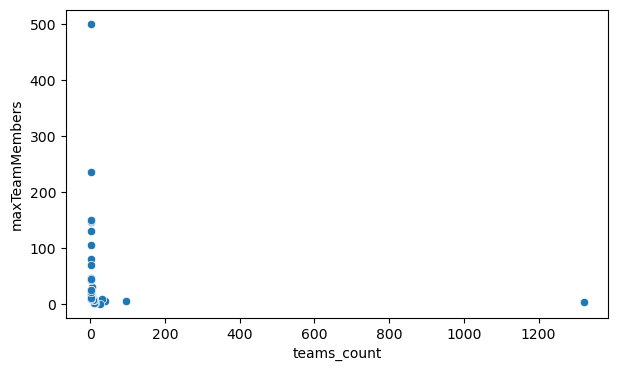

In [269]:
# Изучаем количество участников в команде по колонке game['maxTeamMembers']
team_members = (
    game['maxTeamMembers']
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={'index':'maxTeamMembers', 'maxTeamMembers':'teams_count'})
)

plt.figure(figsize=(7,4))
sns.scatterplot(data=team_members, y="maxTeamMembers", x="teams_count");

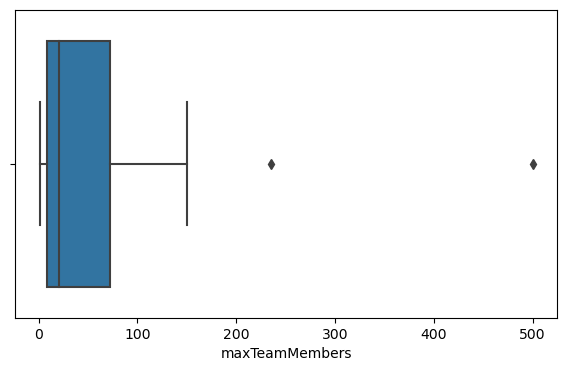

In [268]:
plt.figure(figsize=(7,4))
sns.boxplot(x=team_members['maxTeamMembers']);

In [156]:
#ДАННЫЕ ПОД ВОПРОСОМ
team_members['share'] = team_members['teams_count'] / team_members['teams_count'].sum()
#team_members

In [271]:
#считаем количество участников в команде (группируем по teamId)
team_size = (
    game_participant.groupby(['teamId'])['participantId'].count()
    .reset_index()
    .rename(columns={'participantId':'participant_count'})
    .sort_values(by='participant_count', ascending=False)
    .reset_index()
)

team_size_grouped = (
    team_size.groupby(['participant_count'])[['participant_count']]
    .count()
    .rename(columns={'participant_count':'members_count'})
    .reset_index()
    .sort_values(by='members_count', ascending=False)
)

team_size_grouped['share'] = team_size_grouped['members_count'] / team_size_grouped['members_count'].sum()
team_size_grouped.head()

,participant_count,members_count,share
0,1,10028,0.57
1,2,2412,0.14
3,4,1927,0.11
2,3,1560,0.09
4,5,357,0.02


In [159]:
print(np.percentile(team_size['participant_count'], [90, 95, 99])) 

[4. 4. 5.]


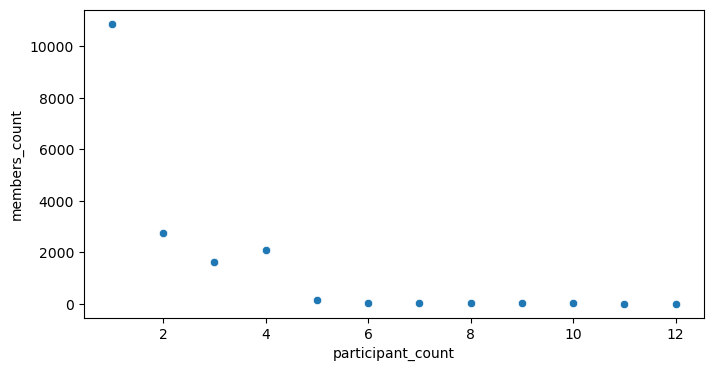

In [160]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=team_size_grouped, y="members_count", x="participant_count");

In [161]:
#количество команд
team_size['participant_count'].sum()

30821

In [162]:
team_size['participant_count'].mode()

0    1
Name: participant_count, dtype: int64

In [163]:
team_size['participant_count'].describe()

count   17534.00
mean        1.76
std         1.16
min         1.00
25%         1.00
50%         1.00
75%         2.00
max        12.00
Name: participant_count, dtype: float64

In [164]:
# Cтроим диаграмму распределения размеров команд

barchart_team_size = px.bar(
    data_frame=team_size_grouped,
    y="members_count",
    x="participant_count",
    color="members_count",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',               
    color_continuous_scale=px.colors.sequential.Burg,                               
    range_color=[1,10000],                                   
    text='members_count',            
    hover_name='participant_count',        
    labels={"members_count":"Количество игр", "participant_count":"Кличество участников в команде"},           
    title='Распределение частоты встречаемости команд по количеству участников', 
    width=1100,                  
    height=400,                   
    template='seaborn',            
)
barchart_team_size

## Вывод

- Встречаются команды от одного до 12 человек;
- Всего было зарегистрировано 30821 команда;
- Самая распространенная команда (62%) состоит всего из одного человека (это среднее значение);
- Далее по распространенности идут команды из двух (15%) и из четырех (11%) человек;
- Не более 5% команд превышает четыре человека.

## 1.4 Количество участников и формат Чистых Игр

In [165]:
game_participant = game_participant.merge(game[['gameId', 'game_name', 'city_name', 'region_name', 'game_year', 'game_month']], on='gameId', how='left')
game_participant.head(2)

,participantId,role,createdAt,updatedAt,deletedAt,userId,gameId,teamId,isBanned,requestedRole,game_name,city_name,region_name,game_year,game_month
0,00003830-1f5f-11ea-be17-2f2d6dc19c42,player,2019-12-15 17:19:07,2021-03-30 13:51:00,NaN,ffcd6860-1f5e-11ea-be17-2f2d6dc19c42,eb9f6460-1f5e-11ea-be17-2f2d6dc19c42,1a728b50-1f5f-11ea-be17-2f2d6dc19c42,0,NaN,Региональный Кубок Чистоты: Чистые Игры в Курске,Курск,Курская,2019,5
1,0001b1b0-e46d-11e9-a098-83aedc8ab491,player,2019-10-01 17:00:41,2019-10-01 17:00:52,NaN,fcd1a770-e46c-11e9-a344-c7e933260100,cee5c340-e2ab-11e9-91a7-7b08bd29f3c1,ce78a310-e42b-11e9-8a63-3f874e01a7a4,0,NaN,Чистые Игры-Астрахань.Осень-2019,Астрахань,Астраханская,2019,10


In [166]:
#количество зарегистрированных участников
game_participant['participantId'].count()

56120

In [167]:
game_participant['role'].value_counts(normalize=True)

player      0.81
volunteer   0.09
moderator   0.06
admin       0.04
Name: role, dtype: float64

In [168]:
#game_participant.query('role == "player"').count()

In [169]:
#считаем количество участнико для каждой игры
game_participants = (
    game_participant.groupby(['game_name', 'city_name', 'region_name', 'game_month'])['participantId'].count()
    .reset_index()
    .rename(columns={'participantId':'participant_count'})
    .sort_values(by='participant_count', ascending=False)
    .reset_index()
)

print(np.percentile(game_participants['participant_count'], [90, 95, 99])) 

[ 90.   115.25 195.25]


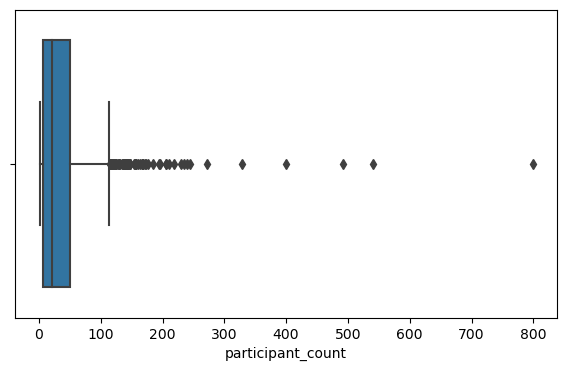

In [272]:
plt.figure(figsize=(7,4))
sns.boxplot(x=game_participants['participant_count']);

In [171]:
game_participants['participant_count'].mean()

36.90243902439025

In [172]:
game_participants['participant_count'].median()

22.0

In [173]:
game_participants['participant_count'].mode()

0    2
Name: participant_count, dtype: int64

#### Чистые Игры большого формата (более 200 участников)

In [273]:
#рассмотрим, какие игры имеют Большой формат, т.е. более 200 участников
big_games = (
    game_participant.groupby(['gameId', 'game_name', 'city_name', 'region_name', 'game_year', 'game_month'])['participantId'].count()
    .reset_index()
    .rename(columns={'participantId':'participant_count'})
    .query('participant_count > 200')
    .sort_values(by='participant_count', ascending=False)
    .reset_index()
)
big_games.head()

#вероятно, "Чистые Игры. Тестовая игра для организаторов" рассматривать не стоит?

,index,gameId,game_name,city_name,region_name,game_year,game_month,participant_count
0,323,3a970aa0-ffed-11e9-9ca8-ed8d50bb71f3,Чистые Куйвози 4,Гарболово,Санкт-Петербург и Лен.область,2017.00,5.00,4367
1,158,1c42f400-ffee-11e9-9ca8-ed8d50bb71f3,Чистые Игры. Чистый Приорат,Гатчина,Санкт-Петербург и Лен.область,2019.00,5.00,4068
2,1156,c640f740-ffe9-11e9-bf48-dd54a3e915b6,Чистый Приорат,Гатчина,Санкт-Петербург и Лен.область,2017.00,5.00,3666
3,989,adbdcd20-ffed-11e9-9ca8-ed8d50bb71f3,Чистые Игры: Ржевский лесопарк 18 мая 2019,Санкт-Петербург,Санкт-Петербург и Лен.область,2019.00,5.00,3170
4,232,29758ab0-ffea-11e9-bf48-dd54a3e915b6,Чистые Игры в Новоорловском заказнике,Санкт-Петербург,Санкт-Петербург и Лен.область,2017.00,8.00,2972


In [279]:
big_games['participant_count'].describe()

count    329.00
mean     429.33
std      481.43
min      202.00
25%      249.00
50%      308.00
75%      423.00
max     4367.00
Name: participant_count, dtype: float64

<AxesSubplot:>

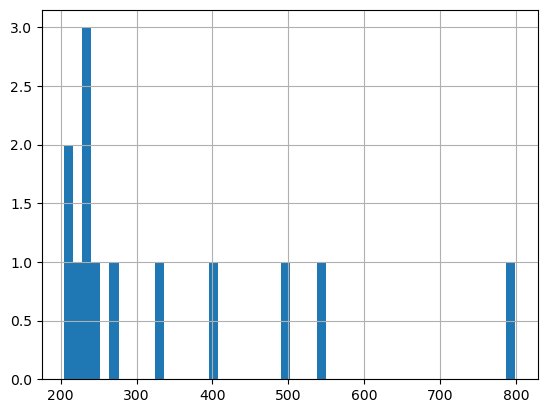

In [175]:
big_games['participant_count'].hist(bins=50)

In [274]:
barchart_big_games = px.bar(
    data_frame=big_games,
    y="participant_count",
    x="city_name",
    color="participant_count",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    color_discrete_sequence=['palevioletred', 'gold', 'red'],              
    color_continuous_scale=px.colors.sequential.Burg,                               
    range_color=[1,10000],                                   
    text='participant_count',            
    hover_name='game_name',       
    labels={"participant_count":"Количество участников", "city_name":"Город"},           
    title='Чистые Игры "Большого" формата (распределение по городам)', 
    width=1000,                  
    height=600,                   
    template='seaborn',            
)
barchart_big_games

#### Чистые Игры среднего формата (от 50 до 200 участников)

In [275]:
#рассмотрим, какие игры имеют Средний формат, т.е. от 50 до 200 участников
medium_games = (
    game_participant.groupby(['gameId', 'game_name', 'city_name', 'region_name', 'game_month'])['participantId'].count()
    .reset_index()
    .rename(columns={'participantId':'participant_count'})
    .query('50 < participant_count <= 200')
    .sort_values(by='participant_count', ascending=False)
    .reset_index()
)
medium_games.head()

,index,gameId,game_name,city_name,region_name,game_month,participant_count
0,163,1cae60a0-d889-11e9-bf9f-5f3608e114bf,Чистые Игры. Осенний кубок чистоты в Вологде,Вологда,Вологодская,9.00,199
1,257,2ddb31c0-a897-11eb-a47a-43f4fede3efc,Чистые Игры| Петропавловск-Камчатский 2021.1,Петропавловск-Камчатский,Камчатский край,5.00,198
2,923,a2843d40-6c8f-11ea-ab1c-8337d72e5693,"Чистые Игры: Торжок, 2018",Торжок,Тверская,4.00,198
3,362,409f6d40-ff09-11ea-b79e-0b35f9b629af,Осенний Кубок Чистоты: Яблоновский сад,Санкт-Петербург,Санкт-Петербург и Лен.область,10.00,197
4,601,6ab7e060-6c8f-11ea-ab1c-8337d72e5693,Чистый забег,Красноярск,Красноярский край,4.00,197


In [278]:
medium_games['participant_count'].describe()

count   516.00
mean    109.38
std      42.34
min      51.00
25%      74.00
50%     100.00
75%     144.00
max     199.00
Name: participant_count, dtype: float64

In [183]:
medium_games['participant_count'].mode()

0    60
Name: participant_count, dtype: int64

<AxesSubplot:>

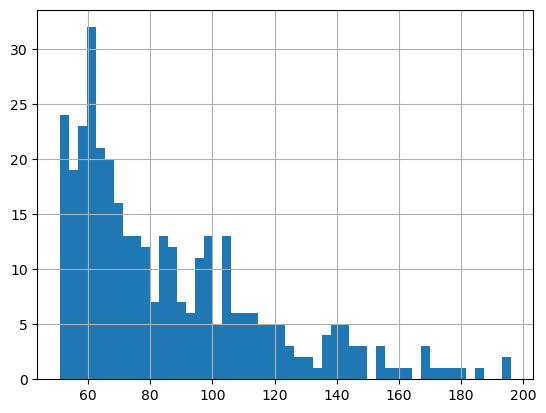

In [180]:
medium_games['participant_count'].hist(bins=50)

In [184]:
barchart_medium_games = px.bar(
    data_frame=medium_games.query('participant_count > 120'),
    y="participant_count",
    x="city_name",
    color="participant_count",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    #color_discrete_sequence=['palevioletred', 'gold', 'red'], 
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,                               
    range_color=[1,10000],                                   
    text='participant_count',            
    hover_name='game_name',  
    #hover_data=['количество'],      
    labels={"participant_count":"Количество участников", "city_name":"Город"},           
    title='Чистые Игры "Среднего" формата с более 120 участниками (распределение по городам)', 
    width=1200,                  
    height=600,                   
    template='seaborn',            
)
barchart_medium_games

#### Чистые Игры малого формата (до 50 участников)

In [276]:
#смотрим, какие игры имеют Маленький формат, т.е. до 50 участников
small_games = (
    game_participant.groupby(['gameId','game_name', 'city_name', 'region_name', 'game_month'])['participantId'].count()
    .reset_index()
    .rename(columns={'participantId':'participant_count'})
    .query('participant_count < 50')
    .sort_values(by='participant_count', ascending=False)
    .reset_index()
)
small_games.head()

,index,gameId,game_name,city_name,region_name,game_month,participant_count
0,1023,b27519b0-e8ee-11e9-89b1-ff8fa32e2484,ШКОЛЬНЫЕ ЧИСТЫЕ ИГРЫ г. Набережные Челны,Набережные Челны,Татарстан,10.00,49
1,1189,cd180e80-cd13-11ea-ad7a-5d43574854ea,"Летние Чистые Игры: Ломоносов, пляж Мартышкино",Ломоносов,Санкт-Петербург и Лен.область,8.00,49
2,265,2e72dde0-e065-11ea-9bff-ed1c28855e7c,Летний Кубок Чистоты: Парк Героев - Пожарных,Санкт-Петербург,Санкт-Петербург и Лен.область,8.00,49
3,271,2f0eac60-f795-11ea-a799-bbba8449bd3a,"Clean Games Baltic Cup 2020 Калининград, Неман",Неман,Калининградская,9.00,49
4,883,9db88360-1086-11ec-9a8f-45e05242e5a3,Чистые Игры Котласского района,Шипицыно,Архангельская,9.00,49


In [277]:
small_games['participant_count'].describe()

count   652.00
mean     20.17
std      13.83
min       1.00
25%       8.00
50%      18.00
75%      30.00
max      49.00
Name: participant_count, dtype: float64

In [189]:
small_games['participant_count'].mode()

0    2
Name: participant_count, dtype: int64

<AxesSubplot:>

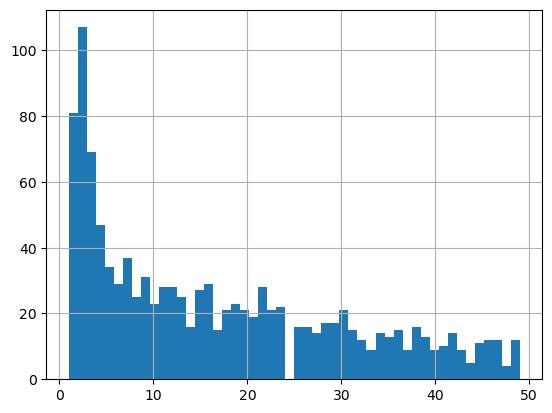

In [186]:
small_games['participant_count'].hist(bins=50)

In [190]:
barchart_small_games = px.bar(
    data_frame=small_games.query('participant_count > 41'),
    y="participant_count",
    x="city_name",
    color="participant_count",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    #color_discrete_sequence=['palevioletred', 'gold', 'red'], 
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,                               
    range_color=[1,10000],                                   
    text='participant_count',            
    #hover_name='game_name',  
    #hover_data=['количество'],      
    labels={"participant_count":"Количество участников", "city_name":"Город"},           
    title='Чистые Игры "Малого" формата (распределение по городам)', 
    width=1100,                  
    height=600,                   
    template='seaborn',            
)
barchart_small_games

In [191]:
game['formatId'].value_counts(normalize=True).reset_index().rename(columns={'index':'format', 'formatId':'share'})

,format,share
0,small,0.52
1,big,0.47
2,medium,0.00


<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Bug report:</b>  По колонке game['formatId'] тоже немного спорное деление, потому что на сайте Чистых Игр указано, что Стандартные игры включают до 200 участников, а Большие до 300 (https://cleangames.org/create#format). Но если посмотреть по количеству участников в каждой игре (то, что  рассматривали выше), то выходит другая картина. Например, Стандартных Игр больше, чем Больших.  </div> 

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий:</b>  Ниже я добавляю колонку с новой классификаций, исходя из количества участников в команде (колонка ['participant_count']). </div> 

In [192]:
game_format = pd.concat([big_games, medium_games, small_games])

#добавляем колонку с классификацией формата, согласно количеству участников в игре
def format_type(row):
    form = row['participant_count']
    if form <= 50 :
        return 'small'
    elif 51 <= form <= 200:
        return 'medium'
    elif 201 <= form <= 10000:
        return 'big'
    else:
        return 

game_format['format_type'] = game_format.apply(format_type, axis=1)

In [193]:
#game_format

In [194]:
game_format_dif = (game_format['format_type']
               .value_counts()
               .reset_index()
               .rename(columns={'index':'format', 'format_type':'count'})
)
game_format_dif

game_format_dif['share'] = game_format_dif['count'] / game_format_dif['count'].sum()
game_format_dif

,format,count,share
0,small,1121,0.75
1,medium,357,0.24
2,big,13,0.01


In [195]:
#строим диаграмму распределения количества игр по формату
barchart_game_format = px.bar(
    data_frame=game_format_dif,
    y="count",
    x="format",
    color="count",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    #color_discrete_sequence=['palevioletred', 'gold'], 
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,                               
    range_color=[1,10000],                                   
    text='count',            
    hover_name='format',  
    #hover_data=['количество'],      
    labels={"count":"Количество игр", "format":"Формат игр"},           
    title='Количество Чистых Игр в рамках каждого формата', 
    width=1100,                  
    height=400,                   
    template='seaborn',            
)
barchart_game_format

In [196]:
city_top_20_list = city_top_20['city_name'].tolist()

game_format_city = (
    game_format.query('city_name == @city_top_20_list')
    .groupby(['city_name', 'format_type'])[['format_type']].count()
    .rename(columns={'format_type':'count'})
    .sort_values(by=['count'], ascending=False)
    .reset_index()
)
#game_format_city

barchart_game_format_city = px.bar(
    data_frame=game_format_city,
    y="count",
    x="city_name",
    color="format_type",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    color_discrete_sequence=['palevioletred', 'gold', 'red'], 
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,                               
    range_color=[1,10000],                                   
    text='count',            
    hover_name='city_name',  
    #hover_data=['количество'],      
    labels={"count":"Количество игр", "city_name":"Город"},           
    title='Распределение формата по городам (топ-20 городов с наибольшем количеством игр)', 
    width=1000,                  
    height=600,                   
    template='seaborn',            
)
barchart_game_format_city

In [197]:
region_top_20_list = region_top_20['region_name'].tolist()

game_format_region = (
    game_format.query('region_name == @region_top_20_list')
    .groupby(['region_name', 'format_type'])[['format_type']].count()
    .rename(columns={'format_type':'count'})
    .sort_values(by=['count'], ascending=False)
    .reset_index()
)
#game_format_region

barchart_game_format_region = px.bar(
    data_frame=game_format_region,
    y="count",
    x="region_name",
    color="format_type",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    color_discrete_sequence=['palevioletred', 'gold', 'red'], 
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,                               
    range_color=[1,10000],                                   
    text='count',            
    hover_name='region_name',  
    #hover_data=['количество'],      
    labels={"count":"Количество", "region_name":"Топ-20 субъектов РФ по количеству ирг"},           
    title='Распределение формата по субъектам РФ', 
    width=1000,                  
    height=600,                   
    template='seaborn',            
)
barchart_game_format_region

## 1.5 Количество команд

In [198]:
game_participant.groupby(['gameId', 'game_name']).agg({'participantId':'count', 'teamId':'count'}).reset_index().head()

,gameId,game_name,participantId,teamId
0,001a3aa0-6c94-11ea-9e1b-8755c2fc6faf,cleanOK,7,2
1,00378ba0-edc2-11ea-966b-5747f3919034,Чистые Игры в Сургуте | Купец,15,8
2,003ff5c0-1f5e-11ea-be17-2f2d6dc19c42,Чистые Игры - Парнас,66,45
3,005ed780-e081-11ea-9bff-ed1c28855e7c,Децентрализованные Чистые Игры,2,0
4,006f92e0-6aad-11ea-8af0-550655c64bf8,Чистые Игры - Чистый сад,22,2


In [199]:
team_per_game = (
    game_participant.groupby(['gameId','game_name', 'city_name', 'region_name', 'game_month'])[['teamId']]
    .count()
    .rename(columns={'teamId':'teams_count'})
    .sort_values(by='teams_count', ascending=False)
    .reset_index()
)

team_per_game.head(3)

,gameId,game_name,city_name,region_name,game_month,teams_count
0,dac12530-8bb3-11eb-9c0d-81ba7e8ac804,Чистые Игры - Казань 2021,Казань,Татарстан,4,349
1,c0476af0-05b8-11ec-93dc-5d11535ef69f,Осенний Кубок чистоты Санкт-Петербурга 2021,Санкт-Петербург,Санкт-Петербург и Лен.область,9,348
2,cc7206d0-6ca5-11ea-8aeb-2fa00d2cd02f,Чистые Игры - победа над мусором (Омск),Омск,Омская,6,281


In [200]:
#количество зарегистрированных команд
game_participant['teamId'].count()

30821

In [280]:
game_participant.groupby(['teamId', 'game_name']).agg({'teamId':'count'}).head()

,,teamId
teamId,game_name,
000027b0-6cfc-11ea-b394-77c35230163f,Чистые Игры в Кумертау,2
000078e0-1df7-11ea-b042-fd5060702b1f,Чистые Игры. Кубок Чистоты - Ростов-на-Дону,1
000113d0-1f65-11ea-a416-3195e965c209,Чистые Игры. Мурманск 2019,1
00016a30-6c8e-11ea-ab1c-8337d72e5693,Чистые Игры. Суровикино,1
000198a0-6c8b-11ea-b593-37b806335872,Чистые Игры: Вологда,1


In [202]:
team_per_game = team_per_game.merge(game_format[['gameId', 'participant_count', 'format_type']], on='gameId', how='left')
team_per_game.head(2)

,gameId,game_name,city_name,region_name,game_month,teams_count,participant_count,format_type
0,dac12530-8bb3-11eb-9c0d-81ba7e8ac804,Чистые Игры - Казань 2021,Казань,Татарстан,4,349,400.00,big
1,c0476af0-05b8-11ec-93dc-5d11535ef69f,Осенний Кубок чистоты Санкт-Петербурга 2021,Санкт-Петербург,Санкт-Петербург и Лен.область,9,348,541.00,big


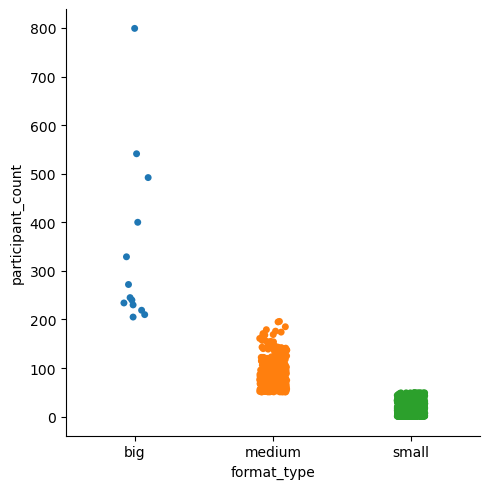

In [203]:
display(sns.catplot(x="format_type", y="participant_count", data=team_per_game))

In [204]:
#среднее количество команд за одну игру каждого формата

team_per_game_grouped = (
    team_per_game.groupby('format_type')['teams_count']
    .median()
    .to_frame()
    .reset_index()
    .rename(columns={'teams_count':'median_teams_count'})
)
team_per_game_grouped

,format_type,median_teams_count
0,big,164.00
1,medium,45.00
2,small,5.00


In [205]:
barchart_team_per_game_grouped = px.bar(
    data_frame=team_per_game_grouped,
    y="median_teams_count",
    x="format_type",
    color="median_teams_count",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    color_discrete_sequence=['palevioletred', 'gold', 'red'], 
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,                               
    range_color=[1,10000],                                   
    text='median_teams_count',            
    hover_name='format_type',  
    #hover_data=['количество'],      
    labels={"median_teams_count":"Среднее количество команд", "format_type":"Среднее количество команд в каждом формате"},           
    title='Формат Чистых Игр', 
    width=1000,                  
    height=400,                   
    template='seaborn',            
)
barchart_team_per_game_grouped

In [206]:
team_count_region = (
    team_per_game.query('region_name == @region_top_20_list')
    .groupby(['region_name', 'format_type'])[['teams_count']].median()
    .rename(columns={'teams_count':'mean_teams_count'})
    .sort_values(by=['mean_teams_count'], ascending=False)
    .reset_index()
)
team_count_region

,region_name,format_type,mean_teams_count
0,Татарстан,big,349.00
1,Башкортостан,big,239.00
2,Москва и Мос.область,big,167.00
3,Архангельская,big,153.00
4,Санкт-Петербург и Лен.область,big,133.00
5,Свердловская,big,129.00
6,Вологодская,medium,65.00
7,Мордовия,medium,58.00
8,Новосибирская,medium,57.00
9,Ставропольский край,medium,56.50


In [207]:
barchart_team_count_region = px.bar(
    data_frame=team_count_region,
    y="mean_teams_count",
    x="region_name",
    color="format_type",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    color_discrete_sequence=['palevioletred', 'gold', 'red'], 
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,                               
    range_color=[1,10000],                                   
    text='mean_teams_count',            
    hover_name='region_name',  
    #hover_data=['количество'],      
    labels={"mean_teams_count":"Среднее количество команд", "region_name":"Топ-20 субъектов РФ по количеству ирг"},           
    title='Среднее количество команд в каждом формате в Топ-20 субъектах РФ (по количеству ирг)', 
    width=1000,                  
    height=600,                   
    template='seaborn',            
)
barchart_team_count_region

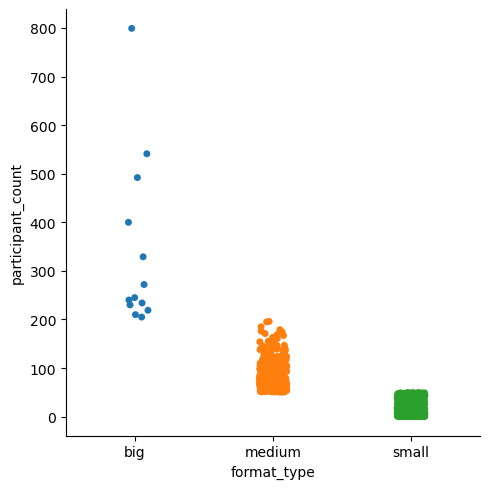

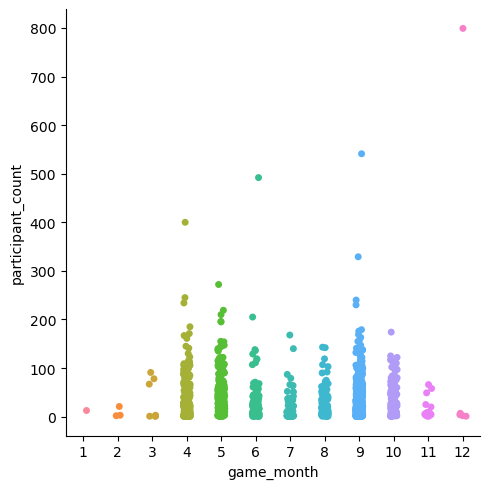

In [208]:
display(sns.catplot(x="format_type", y="participant_count", data=team_per_game))
display(sns.catplot(x="game_month", y="participant_count", data=team_per_game));

## Вывод 

- Всего зарегистрировано 30821 команды;
- В среднем в играх большого формата участвует 164 команды;
- В среднем в играх среднего формата участвует 45 команд;
- В среднем в играх малого формата участвует 5 команд;
- Интересно, что в стреднем (медиана) в республике Татарстан самое большое количество команд.

## Общий вывод по блоку описательной статистики игр и команд

#### Количество участников 
- Всего зарегистрировано 56120 человека (игроки, волонтеры, модераторы и администраторы);
- 81% из них это игроки.

#### Количество участников в командах
- В среднем в рамках одной игры участвует ~37 человек (медиана 22 человека);
-  Интересно, что самые часто встречающиеся игры состоят всего двух человек (не ошибка ли это);

#### Формат Чистых Игр
- Все игры делятся на три категории: 
 - малые (до 50 человек)
 - средние (от 50 до 200)
 - большие (более 200 участников)

- Игр большого формата было всего 14 (пять из них проводилось в 2021 году);
- В среднем в них участвует 330 человек (медиана 242);
- Интересно, что большие игры проводились не только в Питере (что ожидаемо), но, например, три таких игры были организованы в Омске почти каждый год с 2017 (исключение только 2020);
- Самая большая игра состояла почти из 800 участников (Чистые Игры. Тестовая игра для организаторов)

- Было проведено 354 игры Стандартного формата (24%);
- В среднем в рамках одной игры участвует ~87 человек (медиана 79 человек), но чаще всего встречаются игры по 60 человек;

- Больше всего Чистых игр было проведено в Малом формате – 1098 игры (74%);
- В рамках такой игры в среднем участвует ~16 человек (медиана 13 человек), но чаще всего встречаются игры, где зарегистрировано всего два человека;

#### Среднее количество команд в рамках игры и каждого формата
- Всего зарегистрировано 30821 команды;
- В среднем в играх большого формата участвует 164 команды;
- В среднем в играх среднего формата участвует 45 команд;
- В среднем в играх малого формата участвует 5 команд;
- Интересно, что в стреднем (медиана) в республике Татарстан самое большое количество команд.


## 2. Чистые Игры по активностям (срезы по городам, регионам и играм)

Рассматриваем следующие категории таблицы game_module_item:
- garbage - собранный мусор разных категорий;
- artifacts -  интересные находки;
- inventory-sales - игровой инвентарь (грабли, лопаты, сачки, тележки и др.), который получают за доп. баллы;
- checkins - фото-отметка с приложенной геолокацией. Фото территории ДО уборки И после;
- photohunt - Игроки могут фотографировать интересные растения или животных, которые им встретятся на игре;
- riddles -  Викторина.

In [212]:
# garbage - собранный мусор разных категорий
# artifacts -  интересные находки
# inventory-sales - Игровой инвентарь - грабли, лопаты, сачки, тележки и др.
# checkins - фото-отметка с приложенной геолокацией. Фото территории ДО уборки И после
# photohunt - Игроки могут фотографировать интересные растения или животных, которые им встретятся на игре
# riddles -  Викторина               

game_module_item['group'].value_counts(normalize=True)

garbage           0.38
inventory-sales   0.21
checkins          0.17
artifacts         0.12
photohunt         0.08
correction        0.04
riddles           0.00
Name: group, dtype: float64

In [214]:
game_module_item = (
    game_module_item.merge(game[['gameId', 'game_name', 'city_name', 'region_name', 'game_month', 'game_year']], on='gameId', how='left')
)

game_module_item = (
    game_module_item.merge(game_format[['gameId', 'participant_count', 'format_type']], on='gameId', how='left')
)

game_module_item.head(2)

,itemId,dataType,type,group,label,value,weight,units,comment,order,createdAt,updatedAt,deletedAt,gameId,game_name,city_name,region_name,game_month,game_year,participant_count,format_type
0,0005a710-6951-11eb-b56f-554b73777ed0,number,custom,garbage,1 Маленькая покрышка,2,5.00,POINTS,NaN,12,2021-02-07 14:30:17,2021-02-07 14:30:32,NaN,8d65a430-6d3e-11ea-8afb-234d0fe26ce9,Чистые Игры в Вырице,Вырица,Санкт-Петербург и Лен.область,9,2018,118.00,medium
1,0030cfe0-6c94-11ea-9e1b-8755c2fc6faf,number,default,garbage,Mixed garbage,2,7.70,BAGS,Game modules.Default Comment.Mixed garbage,0,2020-03-22 23:22:30,2020-03-22 23:22:31,NaN,001a3aa0-6c94-11ea-9e1b-8755c2fc6faf,cleanOK,Санкт-Петербург,Санкт-Петербург и Лен.область,4,2018,7.00,small


In [216]:
# рассмотрим, в каких городах и субъектах РФ было больше всего активностей и каких категорий (НЕ БАЛЛЫ)
# колонку correction не рассматриваем

game_item_counts_tb = game_module_item.query('group != "correction"')
game_item_counts_tb.head(2)

,itemId,dataType,type,group,label,value,weight,units,comment,order,createdAt,updatedAt,deletedAt,gameId,game_name,city_name,region_name,game_month,game_year,participant_count,format_type
0,0005a710-6951-11eb-b56f-554b73777ed0,number,custom,garbage,1 Маленькая покрышка,2,5.00,POINTS,NaN,12,2021-02-07 14:30:17,2021-02-07 14:30:32,NaN,8d65a430-6d3e-11ea-8afb-234d0fe26ce9,Чистые Игры в Вырице,Вырица,Санкт-Петербург и Лен.область,9,2018,118.00,medium
1,0030cfe0-6c94-11ea-9e1b-8755c2fc6faf,number,default,garbage,Mixed garbage,2,7.70,BAGS,Game modules.Default Comment.Mixed garbage,0,2020-03-22 23:22:30,2020-03-22 23:22:31,NaN,001a3aa0-6c94-11ea-9e1b-8755c2fc6faf,cleanOK,Санкт-Петербург,Санкт-Петербург и Лен.область,4,2018,7.00,small


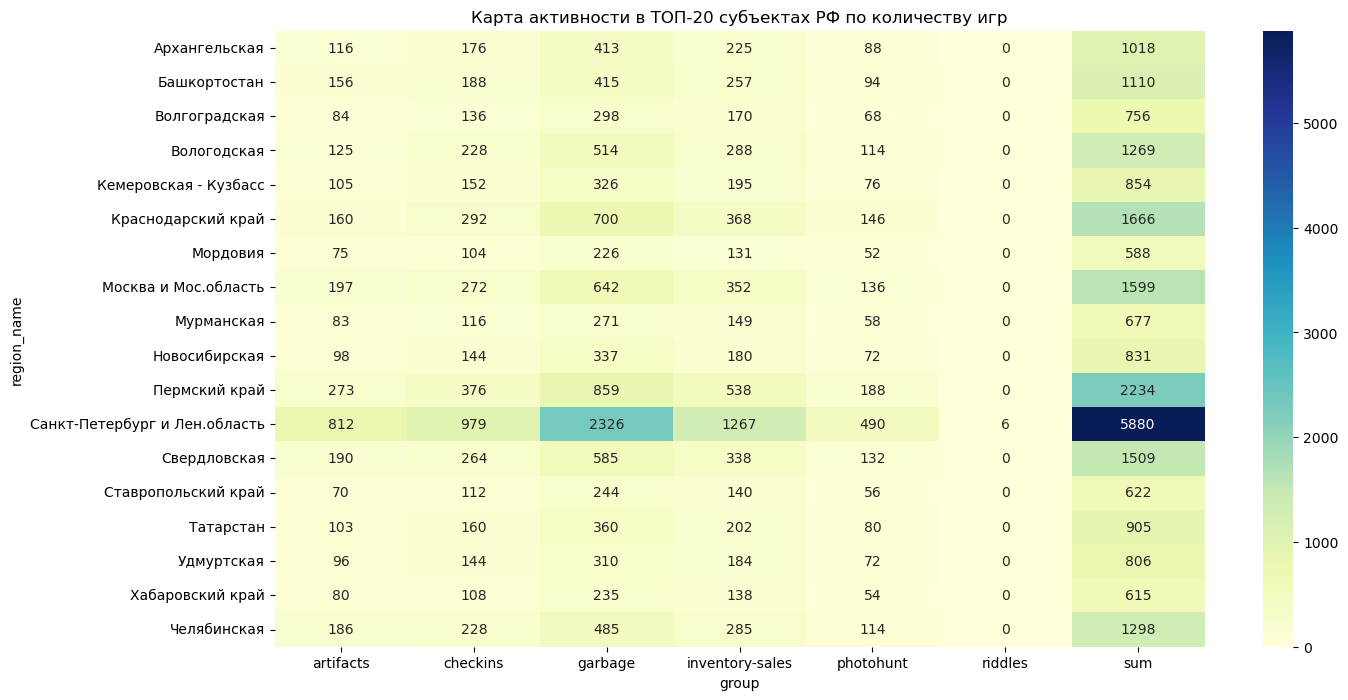

In [217]:
game_item_counts_tb_region =  game_item_counts_tb.query('region_name == @region_top_20_list')
#game_item_counts_tb_region

game_item_counts_tb_region_heatmap = (
    game_item_counts_tb_region.pivot_table(index='region_name', columns='group', values='itemId', aggfunc='count')
    .fillna(0)
    .astype('int')
)

game_item_counts_tb_region_heatmap['sum'] = (
    game_item_counts_tb_region_heatmap['artifacts'] + 
    game_item_counts_tb_region_heatmap['checkins'] +
    game_item_counts_tb_region_heatmap['garbage'] +
    game_item_counts_tb_region_heatmap['inventory-sales'] +
    game_item_counts_tb_region_heatmap['photohunt'] +
    game_item_counts_tb_region_heatmap['riddles']
)
#game_item_counts_tb_region_heatmap

plt.figure(figsize=(15, 8))
sns.heatmap(game_item_counts_tb_region_heatmap, annot=True, fmt='d', cmap="YlGnBu")
plt.title('Карта активности в ТОП-20 субъектах РФ по количеству игр')
plt.show()


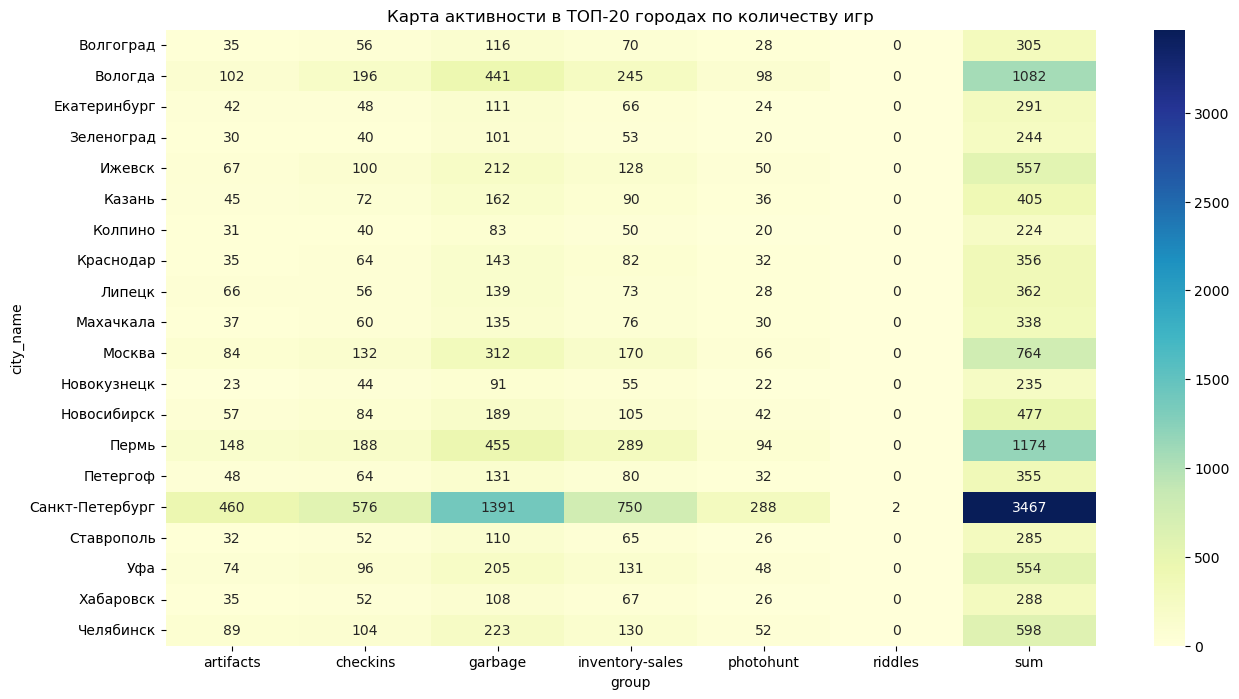

In [218]:
game_item_counts_tb_city =  game_item_counts_tb.query('city_name == @city_top_20_list')
#game_item_counts_tb_region

game_item_counts_tb_city_heatmap = (
    game_item_counts_tb_city.pivot_table(index='city_name', columns='group', values='itemId', aggfunc='count')
    .fillna(0)
    .astype('int')
)

game_item_counts_tb_city_heatmap['sum'] = (
    game_item_counts_tb_city_heatmap['artifacts'] + 
    game_item_counts_tb_city_heatmap['checkins'] +
    game_item_counts_tb_city_heatmap['garbage'] +
    game_item_counts_tb_city_heatmap['inventory-sales'] +
    game_item_counts_tb_city_heatmap['photohunt'] +
    game_item_counts_tb_city_heatmap['riddles']
)
#game_item_counts_tb_city_heatmap

plt.figure(figsize=(15, 8))
sns.heatmap(game_item_counts_tb_city_heatmap, annot=True, fmt='d', cmap="YlGnBu")
plt.title('Карта активности в ТОП-20 городах по количеству игр')
plt.show()

### Количество активностей по играм

In [219]:
game.query('gameId == "56d5d030-8e12-11ea-ada5-132c7e93d023"')

,gameId,kind,status,registrationStatus,purchaseStatus,tag,game_name,address,vkGroup,description,startTime,finishTime,coordinates,sponsorsNotes,volunteersNotes,specialistsNotes,organizersNotes,maxTeamMembers,createdAt,updatedAt,deletedAt,creatorId,contactId,countryId,regionId,cityId,formatId,rules,showInPublicList,firstInTheCity,isCorporate,customerId,posterId,volunteerCode,organizerCode,posterMiniId,playerCode,lang,approvDate,brandId,game_year,game_month,game_weekday,latitude,longitude,city_name,city_type,country_name,region_name
511,56d5d030-8e12-11ea-ada5-132c7e93d023,NaN,finished,closed,closed,homeecoz,Чистые Игры по-домашнему. Зеленоград,NaN,NaN,"<p style=""background: white; margin: 0cm 0cm 1...",2020-06-08,NaN,"[55.97559860642619, 37.2423910792283]",NaN,NaN,NaN,NaN,4,2020-05-04 14:20:05,2021-04-05 12:23:56,NaN,41d42ac0-bb67-11e9-9c97-b7ce82a13a45,41d42ac0-bb67-11e9-9c97-b7ce82a13a45,e7adb440-c24a-11e9-aaf5-23b334007032,4763f690-7291-11eb-a4ac-e5f0f3fb3d81,4fc346a0-78a7-11e9-b378-b1981a6a7fdc,small,<p>1. Перед началом игры проверьте наличие соб...,1,0,0,NaN,5e3f9ec0-9b53-11ea-948f-97ff1b561a1a,596347,886437,NaN,103653.00,NaN,NaN,NaN,2020,6,0,55.98,37.24,Зеленоград,город,Russia,Москва и Мос.область


In [281]:
game_item_counts_active_games = (
    game_item_counts_tb.pivot_table(index=['gameId', 'game_name'], columns='group', values='itemId', aggfunc='count')
    .fillna(0)
    .astype('int')
)
game_item_counts_active_games['sum'] = (
    game_item_counts_active_games['artifacts'] + 
    game_item_counts_active_games['checkins'] +
    game_item_counts_active_games['garbage'] +
    game_item_counts_active_games['inventory-sales'] +
    game_item_counts_active_games['photohunt'] +
    game_item_counts_active_games['riddles']
)

game_item_counts_active_games = game_item_counts_active_games.sort_values(by='sum', ascending=False).head(15)
game_item_counts_active_games = game_item_counts_active_games.merge(game[['gameId', 'game_name', 'city_name', 'country_name', 'game_month', 'game_year']], on='gameId', how='left')
game_item_counts_active_games = game_item_counts_active_games.merge(game_format[['gameId', 'participant_count', 'format_type']], on='gameId', how='left')

#для удобства заказчика меняем данные в колонке "день недели" 
def city_name_active(row):
    city_name = row['city_name']
    country_name = row['country_name']
    if country_name == 'Estonia':
        return 'Tallinn'
    elif country_name == 'Belarus':
        return 'Baranovichi'
    else:
        return city_name
    
game_item_counts_active_games['city_name'] = game_item_counts_active_games.apply(city_name_active, axis=1)
game_item_counts_active_games.head()

,gameId,artifacts,checkins,garbage,inventory-sales,photohunt,riddles,sum,game_name,city_name,country_name,game_month,game_year,participant_count,format_type
0,ccf00e90-d3d5-11e9-9178-3fe9c4a37f4e,12,4,19,7,2,0,44,Чистые Игры: Озеро Долгое,Санкт-Петербург,Russia,9,2019,66.00,medium
1,c4dcd660-d3d6-11e9-9178-3fe9c4a37f4e,9,4,17,7,2,0,39,Clean Games Baltic cup Tallinn,Tallinn,Estonia,9,2019,NaN,NaN
2,52a6fac0-a91e-11eb-b459-cbb267c29075,16,4,10,5,2,0,37,Чистые Игры фестивалю Музей для друзей,Липецк,Russia,5,2021,37.00,small
3,56d5d030-8e12-11ea-ada5-132c7e93d023,5,4,21,5,2,0,37,Чистые Игры по-домашнему. Зеленоград,Зеленоград,Russia,6,2020,54.00,medium
4,f97cf990-d3d6-11e9-9178-3fe9c4a37f4e,8,4,14,5,2,0,33,Чистые Игры: пираты Выборга,Выборг,Russia,9,2019,26.00,small


In [221]:
game_year_active = (
    game_item_counts_active_games['game_year']
    .value_counts()
    .reset_index()
    .rename(columns={'index':'game_year', 'game_year':'count'})
)

game_year_active['share'] = game_year_active['count'] / game_year_active['count'].sum()
display(game_year_active)

barchart_game_year_active = px.bar(
    data_frame=game_year_active,
    y="count",
    x="game_year",
    color="count",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    #color_discrete_sequence=['palevioletred', 'gold', 'red'], 
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,                               
    range_color=[1,10000],                                   
    text='count',            
    hover_name='game_year',  
    #hover_data=['количество'],      
    labels={"count":"Количество игр", "game_year":"Год проведения"},           
    title='Распределение 15 игр с наибольшей активностью участников по годам', 
    width=900,                  
    height=400,                   
    template='seaborn',            
)
barchart_game_year_active

,game_year,count,share
0,2019,7,0.47
1,2021,5,0.33
2,2020,1,0.07
3,2018,1,0.07
4,2017,1,0.07


In [222]:
game_country_active = (
    game_item_counts_active_games['country_name']
    .value_counts()
    .reset_index()
    .rename(columns={'index':'country_name', 'country_name':'count'})
)

game_country_active['share'] = game_country_active['count'] / game_country_active['count'].sum()
display(game_country_active)

barchart_country_name = px.bar(
    data_frame=game_country_active,
    y="count",
    x="country_name",
    color="count",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    #color_discrete_sequence=['palevioletred', 'gold', 'red'], 
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,                               
    range_color=[1,10000],                                   
    text='count',            
    hover_name='country_name',  
    #hover_data=['количество'],      
    labels={"count":"Количество игр", "country_name":"Страна проведения"},           
    title='Распределение 15 игр с наибольшей активностью участников по странам', 
    width=900,                  
    height=400,                   
    template='seaborn',            
)
barchart_country_name

,country_name,count,share
0,Russia,13,0.87
1,Estonia,1,0.07
2,Belarus,1,0.07


In [223]:
game_format_active = (
    game_item_counts_active_games['format_type']
    .value_counts()
    .reset_index()
    .rename(columns={'index':'format_type', 'format_type':'count'})
)

game_format_active['share'] = game_format_active['count'] / game_format_active['count'].sum()
display(game_format_active)

barchart_format_active = px.bar(
    data_frame=game_format_active,
    y="count",
    x="format_type",
    color="count",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    #color_discrete_sequence=['palevioletred', 'gold', 'red'], 
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,                               
    range_color=[1,10000],                                   
    text='count',            
    hover_name='format_type',  
    #hover_data=['количество'],      
    labels={"count":"Количество игр", "format_type":"Формат проведения"},           
    title='Распределение 15 игр с наибольшей активностью участников по формату', 
    width=900,                  
    height=400,                   
    template='seaborn',            
)
barchart_format_active

,format_type,count,share
0,medium,9,0.69
1,small,4,0.31


In [224]:
game_city_active = (
    game_item_counts_active_games['city_name']
    .value_counts()
    .reset_index()
    .rename(columns={'index':'city_name', 'city_name':'count'})
)

game_city_active['share'] = game_city_active['count'] / game_city_active['count'].sum()
display(game_city_active)

barchart_game_city_active = px.bar(
    data_frame=game_city_active,
    y="count",
    x="city_name",
    color="count",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',            
    color_continuous_scale=px.colors.sequential.Burg,                               
    range_color=[1,10000],                                   
    text='count',            
    hover_name='city_name',  
    #hover_data=['количество'],      
    labels={"count":"Количество игр", "city_name":"Город проведения"},           
    title='Распределение 15 игр с наибольшей активностью участников по городам', 
    width=900,                  
    height=400,                   
    template='seaborn',            
)
barchart_game_city_active

,city_name,count,share
0,Санкт-Петербург,3,0.20
1,Липецк,2,0.13
2,Tallinn,1,0.07
3,Зеленоград,1,0.07
4,Выборг,1,0.07
5,Боровичи,1,0.07
6,Яранск,1,0.07
7,Барнаул,1,0.07
8,Пермь,1,0.07
9,Луга,1,0.07


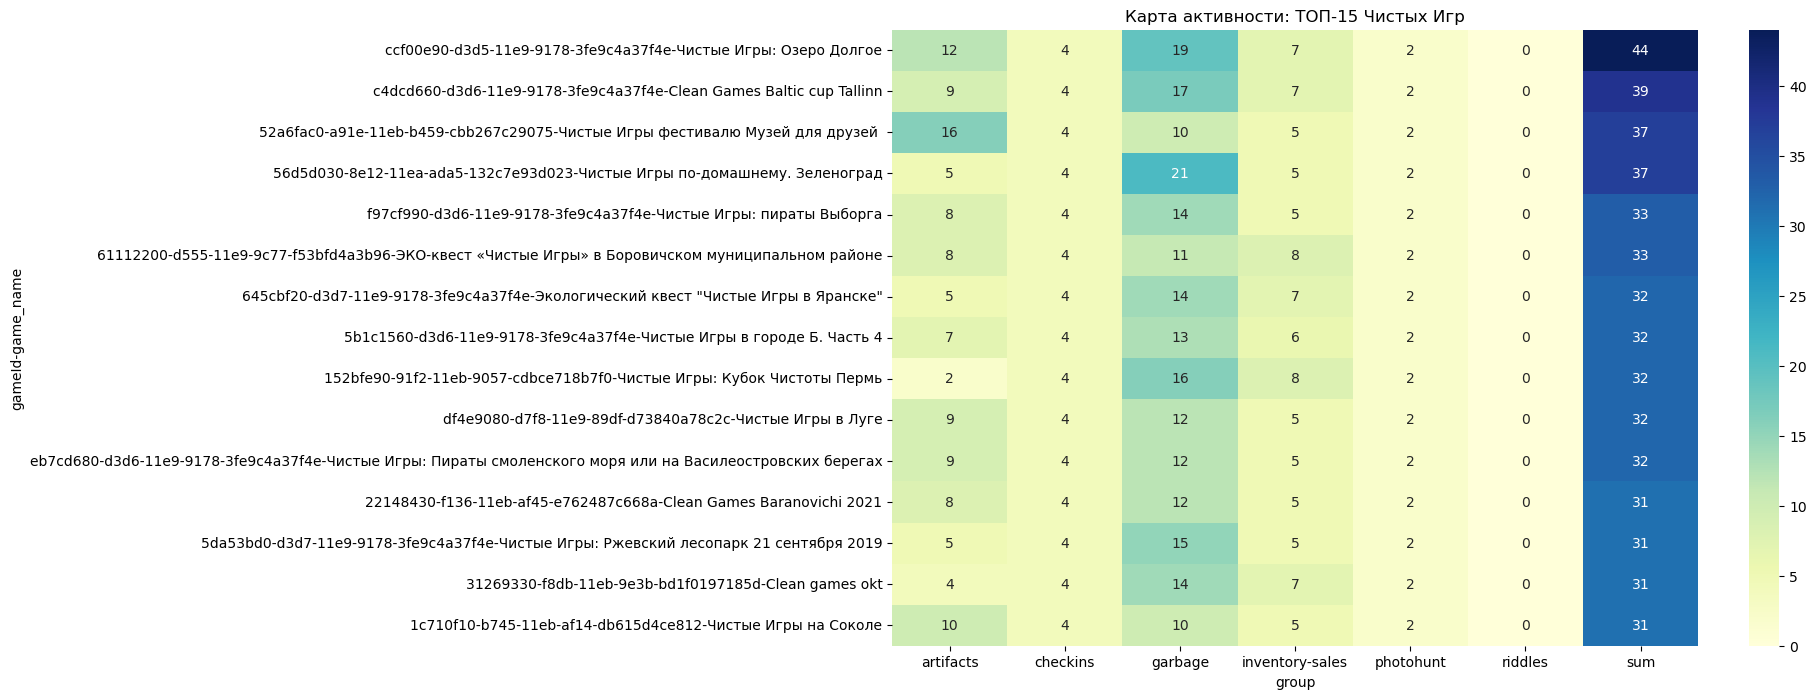

In [225]:
game_item_counts_tb_game_heatmap = (
    game_item_counts_tb.pivot_table(index=['gameId', 'game_name'], columns='group', values='itemId', aggfunc='count')
    .fillna(0)
    .astype('int')
)
game_item_counts_tb_game_heatmap['sum'] = (
    game_item_counts_tb_game_heatmap['artifacts'] + 
    game_item_counts_tb_game_heatmap['checkins'] +
    game_item_counts_tb_game_heatmap['garbage'] +
    game_item_counts_tb_game_heatmap['inventory-sales'] +
    game_item_counts_tb_game_heatmap['photohunt'] +
    game_item_counts_tb_game_heatmap['riddles']
)
game_item_counts_tb_game_top20_heatmap = game_item_counts_tb_game_heatmap.sort_values(by='sum', ascending=False).head(15)

#game_item_counts_tb_game_top20_heatmap = game_item_counts_tb_game_top20_heatmap.drop(['gameId'], inplace=True, axis=1)
#game_item_counts_tb_game_top20_heatmap

plt.figure(figsize=(13, 8))
sns.heatmap(game_item_counts_tb_game_top20_heatmap, annot=True, fmt='d', cmap="YlGnBu")
plt.title('Карта активности: ТОП-15 Чистых Игр')
plt.show()

In [226]:
# game_item_counts_tb_game_heatmap = (
#     game_item_counts_tb.pivot_table(index='game_name', columns='group', values='itemId', aggfunc='count')
#     .fillna(0)
#     .astype('int')
# )
# game_item_counts_tb_game_heatmap['sum'] = (
#     game_item_counts_tb_game_heatmap['artifacts'] + 
#     game_item_counts_tb_game_heatmap['checkins'] +
#     game_item_counts_tb_game_heatmap['garbage'] +
#     game_item_counts_tb_game_heatmap['inventory-sales'] +
#     game_item_counts_tb_game_heatmap['photohunt'] +
#     game_item_counts_tb_game_heatmap['riddles']
# )
# game_item_counts_tb_game_top20_heatmap = game_item_counts_tb_game_heatmap.sort_values(by='sum', ascending=False).head(15)
# #game_item_counts_tb_game_top20_heatmap = game_item_counts_tb_game_top20_heatmap.reset_index().drop('sum')
# game_item_counts_tb_game_top20_heatmap

# plt.figure(figsize=(13, 8))
# sns.heatmap(game_item_counts_tb_game_top20_heatmap, annot=True, fmt='d', cmap="YlGnBu")
# plt.title('Карта активности: ТОП-15 Чистых Игр')
# plt.show()

In [227]:
game.query('game_name == "Чистые Куйвози 4"')

,gameId,kind,status,registrationStatus,purchaseStatus,tag,game_name,address,vkGroup,description,startTime,finishTime,coordinates,sponsorsNotes,volunteersNotes,specialistsNotes,organizersNotes,maxTeamMembers,createdAt,updatedAt,deletedAt,creatorId,contactId,countryId,regionId,cityId,formatId,rules,showInPublicList,firstInTheCity,isCorporate,customerId,posterId,volunteerCode,organizerCode,posterMiniId,playerCode,lang,approvDate,brandId,game_year,game_month,game_weekday,latitude,longitude,city_name,city_type,country_name,region_name
344,3a970aa0-ffed-11e9-9ca8-ed8d50bb71f3,PASSPORT,finished,closed,closed,kuyvozi4,Чистые Куйвози 4,Уровское озеро,https://vk.com/event144697491,В Ленинградской области в эту субботу пройдет ...,2017-05-13,NaN,"[60.34032007, 30.49176231]",NaN,NaN,NaN,NaN,4,2019-11-05 16:56:36,2021-04-05 12:23:56,NaN,9af4c870-1838-11ea-8c29-656e47893f34,d6f2d6a0-bafa-11e9-8905-098fcc89d2a7,e7adb440-c24a-11e9-aaf5-23b334007032,0434f640-90cc-11eb-91d2-6f7db6fb7482,586fd640-012a-11ea-ae7a-5ffdf880baf8,big,NaN,1,0,0,NaN,3ae79ba0-ffed-11e9-9ca8-ed8d50bb71f3,597621,887711,NaN,102379.00,NaN,NaN,NaN,2017,5,5,60.34,30.49,Гарболово,город,Russia,Санкт-Петербург и Лен.область


In [229]:
# рассмотрим, какие игры были самыми активными по количеству item разных категорий (НЕ БАЛЛЫ)
# колонку correction не рассматриваем

game_item_counts_per_game = (
    pd.crosstab(index=game_item_counts_tb['game_name'], columns=[game_item_counts_tb['group']],margins=True)
    .style.background_gradient(cmap='YlGnBu')
)
#game_item_counts_per_game

In [230]:
game_item_counts_city = (
    pd.crosstab(index=game_item_counts_tb['city_name'], columns=[game_item_counts_tb['group']],margins=True)
    .style.background_gradient(cmap='YlGnBu')
)
#game_item_counts_city

In [231]:
# рассмотрим, в каких регионах было больше всего активностей и каких категорий (НЕ БАЛЛЫ)
# колонку correction не рассматриваем
game_item_counts_region = (
    pd.crosstab(index=game_item_counts_tb['region_name'], columns=[game_item_counts_tb['group']],margins=True)
    .style.background_gradient(cmap='YlGnBu')
)
#game_item_counts_region

### Количество собранного мусора 

In [282]:
game_garbage_count = game_item_counts_tb.query('group == "garbage"')

game_garbage_weight = (
    game_garbage_count.pivot_table(index='gameId', columns='group', values='weight', aggfunc='sum')
    .rename(columns={'garbage':'garbage_kg'})
    #.fillna(0)
    #.astype('int')
    .sort_values(by='garbage_kg', ascending=False)
    .reset_index()
)
game_garbage_weight['garbage_ton'] = round((game_garbage_weight['garbage_kg'] / 1000), 2)
game_garbage_weight['sgare'] = round((game_garbage_weight['garbage_ton'] / game_garbage_weight['garbage_ton'].sum()),2)
game_garbage_weight = game_garbage_weight.merge(game[['gameId', 'game_name', 'city_name', 'country_name', 'game_year']], on='gameId', how='left')
game_garbage_weight = game_garbage_weight.merge(game_format[['gameId', 'participant_count', 'format_type']], on='gameId', how='left')
game_garbage_weight.head()

,gameId,garbage_kg,garbage_ton,sgare,game_name,city_name,country_name,game_year,participant_count,format_type
0,ba963a10-6dbf-11ea-a04f-d55c56fb6b04,461.40,0.46,0.01,Clean Shiraoi,NaN,Japan,2018,NaN,NaN
1,843b2970-ffd8-11ea-ae1c-b7fddd488ede,201.52,0.20,0.00,Охота на колёса 2020,Санкт-Петербург,Russia,2020,15.00,small
2,934582a0-0278-11ec-9c08-71ab7724c739,160.22,0.16,0.00,Охота на колёса - 2021: Санкт-Петербург и Лени...,Санкт-Петербург,Russia,2021,24.00,small
3,b8a3b8f0-0e76-11ec-a8c3-81cce3045df8,159.22,0.16,0.00,Охота на колёса: Вологда и Вологодский район,Вологда,Russia,2021,9.00,small
4,d65ae220-caaf-11eb-bd73-ab319b83d8ca,159.22,0.16,0.00,Охота на колёса в Кингисеппском районе,Кингисепп,Russia,2021,1.00,small


In [233]:
barchart_garbage_ton = px.bar(
    data_frame=game_garbage_weight.query('garbage_ton > 0.10'),
    y="garbage_ton",
    x="game_name",
    color="garbage_ton",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    #color_discrete_sequence=['palevioletred', 'gold'], 
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,                               
    #range_color=[1,10000],                                   
    text='garbage_ton',            
    #hover_name='city_name',  
    #hover_data=['city_name'],      
    labels={"garbage_ton":"Количество тонн", "game_name":"Название игры"},           
    title='Количество собранного мусора (ТОП-10 игр)', 
    width=1150,                  
    height=600,                   
    template='seaborn',            
)
barchart_garbage_ton

In [234]:
game_garbage_year_ton = (
    game_garbage_count.pivot_table(index='game_year', columns='group', values='weight', aggfunc='sum')
    .rename(columns={'garbage':'garbage_kg'})
    #.fillna(0)
    #.astype('int')
    .sort_values(by='garbage_kg', ascending=False)
    .reset_index()
    .sort_values(by='game_year')
)
game_garbage_year_ton['garbage_ton'] = round((game_garbage_year_ton['garbage_kg'] / 1000), 2)
game_garbage_year_ton['share'] = round((game_garbage_year_ton['garbage_ton'] / game_garbage_year_ton['garbage_ton'].sum()),2)
game_garbage_year_ton

group,game_year,garbage_kg,garbage_ton,share
7,2014,82.90,0.08,0.00
6,2015,370.70,0.37,0.01
5,2016,960.95,0.96,0.02
4,2017,3263.23,3.26,0.05
2,2018,13302.98,13.30,0.22
1,2019,15939.47,15.94,0.26
3,2020,7970.43,7.97,0.13
0,2021,19694.49,19.69,0.32
8,2022,80.29,0.08,0.00


In [235]:
game_garbage_year_ton['garbage_ton'].sum()

61.650000000000006

In [236]:
game_garbage_year_ton['garbage_kg'].sum()

61665.439999999995

In [237]:
barchart_garbage_year_ton = px.bar(
    data_frame=game_garbage_year_ton.query('game_year != 2022'),
    y="garbage_ton",
    x="game_year",
    color="garbage_ton",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    #color_discrete_sequence=['palevioletred', 'gold'], 
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,                               
    #range_color=[1,10000],                                   
    text='garbage_ton',            
    #hover_name='city_name',  
    #hover_data=['city_name'],      
    labels={"garbage_ton":"Количество тонн", "game_year":"Год"},           
    title='Количество собранного мусора в тоннах по годам', 
    width=1150,                  
    height=500,                   
    template='seaborn',            
)
barchart_garbage_year_ton

In [283]:
game_garbage_count.head()

,itemId,dataType,type,group,label,value,weight,units,comment,order,createdAt,updatedAt,deletedAt,gameId,game_name,city_name,region_name,game_month,game_year,participant_count,format_type
0,0005a710-6951-11eb-b56f-554b73777ed0,number,custom,garbage,1 Маленькая покрышка,2,5.00,POINTS,NaN,12,2021-02-07 14:30:17,2021-02-07 14:30:32,NaN,8d65a430-6d3e-11ea-8afb-234d0fe26ce9,Чистые Игры в Вырице,Вырица,Санкт-Петербург и Лен.область,9,2018,118.00,medium
1,0030cfe0-6c94-11ea-9e1b-8755c2fc6faf,number,default,garbage,Mixed garbage,2,7.70,BAGS,Game modules.Default Comment.Mixed garbage,0,2020-03-22 23:22:30,2020-03-22 23:22:31,NaN,001a3aa0-6c94-11ea-9e1b-8755c2fc6faf,cleanOK,Санкт-Петербург,Санкт-Петербург и Лен.область,4,2018,7.00,small
2,0030cfe1-6c94-11ea-9e1b-8755c2fc6faf,number,default,garbage,Plastic,7,2.60,BAGS,Game modules.Default Comment.Plastic,0,2020-03-22 23:22:30,2020-03-22 23:22:31,NaN,001a3aa0-6c94-11ea-9e1b-8755c2fc6faf,cleanOK,Санкт-Петербург,Санкт-Петербург и Лен.область,4,2018,7.00,small
3,0030cfe2-6c94-11ea-9e1b-8755c2fc6faf,number,default,garbage,Metal,5,7.20,BAGS,Game modules.Default Comment.Metal,0,2020-03-22 23:22:30,2020-03-22 23:22:31,NaN,001a3aa0-6c94-11ea-9e1b-8755c2fc6faf,cleanOK,Санкт-Петербург,Санкт-Петербург и Лен.область,4,2018,7.00,small
4,0030cfe3-6c94-11ea-9e1b-8755c2fc6faf,number,default,garbage,Glass,6,11.70,BAGS,Game modules.Default Comment.Glass,0,2020-03-22 23:22:30,2020-03-22 23:22:31,NaN,001a3aa0-6c94-11ea-9e1b-8755c2fc6faf,cleanOK,Санкт-Петербург,Санкт-Петербург и Лен.область,4,2018,7.00,small


In [239]:
game_garbage_weight_format = (
    game_garbage_count.groupby('format_type')['weight'].sum()
    #.rename(columns={'weight':'total_weight'})
    #.fillna(0)
    #.astype('int')
    #.sort_values(by='garbage_kg', ascending=False)
    .reset_index()
)
game_garbage_weight_format
game_garbage_weight_format['garbage_ton'] = round((game_garbage_weight_format['weight'] / 1000), 2)
game_garbage_weight_format['sgare'] = round((game_garbage_weight_format['garbage_ton'] / game_garbage_weight_format['garbage_ton'].sum()),2)
game_garbage_weight_format

,format_type,weight,garbage_ton,sgare
0,big,531.18,0.53,0.01
1,medium,13839.14,13.84,0.24
2,small,43289.44,43.29,0.75


In [240]:
barchart_garbage_weight_format = px.bar(
    data_frame=game_garbage_weight_format,
    y="garbage_ton",
    x="format_type",
    color="garbage_ton",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',            
    color_continuous_scale=px.colors.sequential.Burg,                                                                 
    text='garbage_ton',                
    labels={"garbage_ton":"Количество тонн", "format_type":"Формат"},           
    title='Количество собранного мусора в тоннах по форматам', 
    width=900,                  
    height=500,                   
    template='seaborn',            
)
barchart_garbage_weight_format

## Выводы

Среди субъектов РФ по количеству активностей выделяются: Санкт-Петербург и Лен.область, Пермский край, Свердловская, Вологодская, Московская, Волгоградская и Челябинская области.

Среди городов по количеству активностей лидируют: Санкт-Петербург, Гатчина, Вологда, Пермь, Петергоф, Гарболово. В Москве активность довольно низкая.

Среди игр самые активные:
- Чистые Игры. Чистый Приорат
- Чистый Приорат
- Чистые Куйвози 4	
- Чистый Петергоф - 6
- Чистые Игры: Красносельский район
- Чистые Игры: Ржевский лесопарк 18 мая 2019
- Чистые Игры: Кубок Чистоты Пермь
- Экологические манёвры 2017	
- Экоквест в рамках экомарафона Понеслось!	

### 2.1 Артефакты

In [241]:
#рассмотрим, на каких играх собирают больше всего артефактов и где 
artifacts_slice = game_module_item[game_module_item['group'] == 'artifacts']
#общее количество собранных артефактов
artifacts_slice['itemId'].count()

4652

In [242]:
#artifacts_slice

In [243]:
artifacts = (
    artifacts_slice.groupby(['game_name', 'city_name', 'region_name'])['itemId'].count()
    .reset_index()
    .rename(columns={'itemId':'artifacts_count'})
    .sort_values(by='artifacts_count', ascending=False)
    .reset_index()
)
artifacts.head(10)

,index,game_name,city_name,region_name,artifacts_count
0,1353,Чистый марафон,Челябинск,Челябинская,18
1,740,Чистые Игры в Лужском районе,Луга,Санкт-Петербург и Лен.область,16
2,984,Чистые Игры фестивалю Музей для друзей,Липецк,Липецкая,16
3,839,Чистые Игры в Тынде,Тында,Амурская,13
4,769,Чистые Игры в Обнинске,Обнинск,Калужская,13
5,1216,Чистые Игры: Озеро Долгое,Санкт-Петербург,Санкт-Петербург и Лен.область,12
6,588,Чистые Игры Калевалы,Калевала,Карелия,12
7,712,Чистые Игры в Когалыме,Когалым,Ханты-Мансийский АО - Югра,12
8,777,Чистые Игры в Осиновой роще,Санкт-Петербург,Санкт-Петербург и Лен.область,12
9,671,Чистые Игры в Амге,Амга,Саха (Якутия),10


In [244]:
artifacts_grouped = (
    artifacts_slice.groupby(['gameId', 'game_name'])['itemId'].count()
    .reset_index()
    .rename(columns={'itemId':'artifacts_count'})
    .sort_values(by=['artifacts_count'], ascending=False)
    .reset_index()
)

artifacts_grouped.head()

,index,gameId,game_name,artifacts_count
0,488,52a6fac0-a91e-11eb-b459-cbb267c29075,Чистые Игры фестивалю Музей для друзей,16
1,1257,ccf00e90-d3d5-11e9-9178-3fe9c4a37f4e,Чистые Игры: Озеро Долгое,12
2,889,9522b330-1f77-11ea-993a-8bef786aea6d,Чистые Игры в Амге,10
3,169,1c710f10-b745-11eb-af14-db615d4ce812,Чистые Игры на Соколе,10
4,205,226b11f0-6db2-11ea-ac58-8ff18e1ba185,Чистые Игры в Гармонии с природой,9


In [245]:
#artifacts_slice.query('game_name == "Чистые Куйвози 4"')

In [284]:
#рассматриваем игры, с наибольшим количеством собранных артефактов
artifacts_grouped_game = (
    artifacts_slice.groupby(['game_name', 'city_name'])['itemId'].count()
    .reset_index()
    .rename(columns={'itemId':'total_count'})
    .sort_values(by=['total_count'], ascending=False)
    .reset_index()
)

barchart_game_artifacts_grouped_city = px.bar(
    data_frame=artifacts_grouped_game.query('total_count > 300'),
    y="total_count",
    x="game_name",
    color="total_count",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    #color_discrete_sequence=['palevioletred', 'gold'], 
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,                               
    #range_color=[1,10000],                                   
    text='city_name',            
    hover_name='city_name',  
    hover_data=['city_name'],      
    labels={"total_count":"Количество", "game_name":"Название игры"},           
    title='Количество единиц артефактов по играм', 
    width=1150,                  
    height=500,                   
    template='seaborn',            
)
barchart_game_artifacts_grouped_city

In [285]:
#рассматриваем города, с наибольшим количеством собранных артефактов
artifacts_grouped_city = (
    artifacts_slice.groupby(['city_name'])['itemId'].count()
    .reset_index()
    .rename(columns={'itemId':'total_count'})
    .sort_values(by=['total_count'], ascending=False)
    .reset_index()
)

barchart_game_artifacts_grouped_city = px.bar(
    data_frame=artifacts_grouped_city.query('total_count > 400'),
    y="total_count",
    x="city_name",
    color="total_count",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    #color_discrete_sequence=['palevioletred', 'gold'], 
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,                               
    #range_color=[1,10000],                                   
    text='total_count',            
    #hover_name='game_name',  
    hover_data=['total_count'],      
    labels={"total_count":"Количество", "city_name":"Название города"},           
    title='Количество собранных артефактов по городам', 
    width=1000,                  
    height=500,                   
    template='seaborn',            
)
barchart_game_artifacts_grouped_city

In [248]:
#рассматриваем субъекты РФ с наибольшим количеством артефактов
artifacts_grouped_region = (
    artifacts_slice.groupby(['region_name'])['itemId'].count()
    .reset_index()
    .rename(columns={'itemId':'total_count'})
    .sort_values(by=['total_count'], ascending=False)
    .reset_index()
)
artifacts_grouped_list = artifacts_grouped_region['region_name'].tolist()
#artifacts_grouped.head(20)

barchart_game_artifacts_region = px.bar(
    data_frame=artifacts_grouped_region.query('total_count > 400'),
    y="total_count",
    x="region_name",
    color="total_count",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    #color_discrete_sequence=['palevioletred', 'gold'], 
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,                               
    #range_color=[1,10000],                                   
    text='total_count',            
    #hover_name='game_name',  
    #hover_data=['city_name'],      
    labels={"total_count":"Количество", "region_name":"Название"},           
    title='Количество собранных артефактов по субъектам РФ', 
    width=1000,                  
    height=500,                   
    template='seaborn',            
)
barchart_game_artifacts_region

## Выводы к блоку "Артефакты"

- Игры-рекордсмены по количеству артефактов: Чистые Куйвози 4 (г. Гарболово, Лен. область) и Чистый Приорат (г. Гатчина,  Лен. область), там собрали более 1000 артефактов;
-  Больше всего артефактов (более 1000 в целом) было собрано в Санкт-Петербурге, Гатчине, Перми, Петергофе, Гарболово и Вологде;
- Самое большое количество артефактов собрали в Ленинградской и области и Пермском крае.

## 2.2 Фотоохота

In [249]:
#рассмотрим, на каких играх чаще применяют фотоохоту
photohunt_slice = game_module_item[game_module_item['group'] == 'photohunt']

photohunt_slice['itemId'].count()

3188

In [250]:
photohunt = (
    photohunt_slice.groupby(['gameId', 'game_name', 'city_name', 'region_name'])['itemId'].count()
    .reset_index()
    .rename(columns={'itemId':'photohunt_count'})
    .sort_values(by='gameId', ascending=False)
    .reset_index()
)
photohunt.head()

,index,gameId,game_name,city_name,region_name,photohunt_count
0,1501,ffa8ea30-14bc-11ec-bfa5-3d95011b0227,Чистые Игры Сочи 2021,Сочи,Краснодарский край,2
1,1500,ff7b0e80-1df1-11ea-a001-b3797f72dd26,Чистые Игры | ОЛИМП,Владивосток,Приморский край,2
2,1499,ff178f50-018e-11eb-8bb4-d3a937687a35,Clean Games Intercontinental Cup «Russia – USA...,Выборг,Санкт-Петербург и Лен.область,2
3,1498,fed674b0-6dbf-11ea-a04f-d55c56fb6b04,Чистые Игры - СПОРТ,Санкт-Петербург,Санкт-Петербург и Лен.область,2
4,1497,fe9077a0-6ce6-11ea-ad6b-67256f1cb52f,Чистый Члинский,Ставрополь,Ставропольский край,2


In [251]:
#за каждую игру проводилось не более 2 фотоохот? Интересно, есть ли органичение у организатора. 

photohunt_grouped = (
    photohunt_slice.groupby(['gameId', 'game_name'])['itemId'].count()
    .reset_index()
    .rename(columns={'itemId':'photohunt_count'})
    .sort_values(by=['photohunt_count'], ascending=False)
    .reset_index()
)
photohunt_grouped['photohunt_count'].describe()

count   1594.00
mean       2.00
std        0.00
min        2.00
25%        2.00
50%        2.00
75%        2.00
max        2.00
Name: photohunt_count, dtype: float64

In [252]:
#рассматриваем регионы\области\края, с наибольшим количеством  раз проведенной фотоохотой
photohunt_grouped_region = (
    photohunt_slice.groupby(['region_name'])['itemId'].count()
    .reset_index()
    .rename(columns={'itemId':'total_count'})
    .sort_values(by=['total_count'], ascending=False)
    .reset_index()
)
photohunt_grouped_list = photohunt_grouped_region['region_name'].tolist()
#photohunt_grouped.head(20)

barchart_game_photohunt_grouped = px.bar(
    data_frame=photohunt_grouped_region.query('total_count > 35'),
    y="total_count",
    x="region_name",
    color="total_count",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    #color_discrete_sequence=['palevioletred', 'gold'], 
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,                               
    #range_color=[1,10000],                                   
    text='total_count',            
    #hover_name='game_name',  
    hover_data=['total_count'],      
    labels={"total_count":"Количество", "region_name":"Название области"},           
    title='Количество единиц фотоохоты по субъектам РФ', 
    width=1000,                  
    height=500,                   
    template='seaborn',            
)
barchart_game_photohunt_grouped

In [253]:
#рассматриваем города, с наибольшим количеством  раз проведенной фотоохотой
photohunt_grouped_city = (
    photohunt_slice.groupby(['city_name'])['itemId'].count()
    .reset_index()
    .rename(columns={'itemId':'total_count'})
    .sort_values(by=['total_count'], ascending=False)
    .reset_index()
)
#photohunt_grouped_list = photohunt_grouped['region_name'].tolist()
#photohunt_grouped.head(20)

barchart_game_photohunt_grouped_city = px.bar(
    data_frame=photohunt_grouped_city.query('total_count > 20'),
    y="total_count",
    x="city_name",
    color="total_count",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    #color_discrete_sequence=['palevioletred', 'gold'], 
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,                               
    #range_color=[1,10000],                                   
    text='total_count',            
    #hover_name='game_name',  
    hover_data=['total_count'],      
    labels={"total_count":"Количество", "city_name":"Название города"},           
    title='Количество единиц фотоохоты по городам', 
    width=1000,                  
    height=500,                   
    template='seaborn',            
)
barchart_game_photohunt_grouped_city

## Выводы к блоку "Фотоохота"

- По числу вовлеченных игроков в активность Фотоохота лидирует Санкт-Петербург и Ленинградская область, там за все время 490 раз проводилась фотоохота (что пропорционально общему количеству проведенных игр).
- Следующие по количество (более 100) идут: Пермский край, Краснодарский край, Москва и Мос.область, Свердловская, Вологодская и Челябинск.
- Среди городов выделяются Санкт-Петербург, Вологда и Пермь (более 100 раз);
- На каждую игру приходится ровно две зарегистрированной фотоохоты. Интересно, это ограничение организатора? В правилах информации нет. 


В целом, в активность фотоохоту вовлекается мало участников Чистых Игр.

## 3. Критерии команды, способствующие победе в чистых играх

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Bug report:</b>  
      
В процессе исследования выявились следующие аномалии:
    
1) после группировки game_transaction по teamId и подсчета участников participantId (формируем размеры команд) появляются нули, т.е. не для всех команд известны participantId участников. В целом, таких строк было не очень много.
    
2) размеры команды возникли самые разнообразные, хотя ранее в исследовании таблицы game_participant было четко - команды от 1 до 12 человек. Не совсем понимаю, почему за одной командой числятся столько участников. Могу предположить, что в game_transaction не совсем корректно указаны команды teamId.
    
Я провела одинаковые группировки для таблиц game_transaction и game_participant (к это таблице добавила баллы по participantId). Результаты тоже разные.

   </div> 
    
   </div> 

In [254]:
game_transaction = (
    game_transaction.merge(game[['gameId', 'game_name', 'city_name', 'region_name', 'game_month']], on='gameId', how='left')
)

game_transaction.head(2)

,id,direction,sum,comment,createdAt,updatedAt,deletedAt,gameId,participantId,teamId,eventId,game_name,city_name,region_name,game_month
0,0000bff0-6d28-11ea-9894-db36c7fcea0b,incoming,5.00,,2020-03-23 17:01:55,2020-03-23 17:01:55,NaN,8c673e70-6d27-11ea-9894-db36c7fcea0b,91f499a0-6d27-11ea-9894-db36c7fcea0b,b14bfa00-6d27-11ea-9894-db36c7fcea0b,ffe91940-6d27-11ea-9894-db36c7fcea0b,Всемирный день чистоты: Чистые Игры в Жулебино,Москва,Москва и Мос.область,9.00
1,00011a30-1a8b-11ea-bce2-efb3605dd4a3,incoming,5.00,NaN,2019-12-09 13:51:29,2019-12-09 13:51:29,2020-03-22 23:28:38,3a970aa0-ffed-11e9-9ca8-ed8d50bb71f3,3db86ee0-ffed-11e9-9ca8-ed8d50bb71f3,535e45d0-ffed-11e9-9ca8-ed8d50bb71f3,ffea36d0-1a8a-11ea-bce2-efb3605dd4a3,Чистые Куйвози 4,Гарболово,Санкт-Петербург и Лен.область,5.00


In [255]:
#игры-лидеры по количеству набранных баллов
game_points = (
    game_transaction.groupby(['gameId', 'game_name', 'city_name', 'region_name'])['sum'].sum()
    .reset_index()
    .rename(columns={'sum':'total_points_per_game'})
    .sort_values(by='total_points_per_game', ascending=False)
    .reset_index()
)
game_points.head()

,index,gameId,game_name,city_name,region_name,total_points_per_game
0,1014,b9375f90-2328-11eb-81ad-c17c8d681b10,Чистые Игры. Тестовая игра для организаторов (...,Санкт-Петербург,Санкт-Петербург и Лен.область,22094392.66
1,233,2ccf61f0-6cf4-11ea-ba81-110ce13b5f34,Русско-японские соревнования по сбору мусора,Москва,Москва и Мос.область,81496.75
2,5,00828400-6d31-11ea-9196-8fae348c6d47,Чистые Игры в Ярушкинском Дендропарке,Ижевск,Удмуртская,35856.00
3,1092,c640f740-ffe9-11e9-bf48-dd54a3e915b6,Чистый Приорат,Гатчина,Санкт-Петербург и Лен.область,34179.60
4,305,3a970aa0-ffed-11e9-9ca8-ed8d50bb71f3,Чистые Куйвози 4,Гарболово,Санкт-Петербург и Лен.область,30530.40


In [256]:
# (!!) т.к. "Чистые Игры. Тестовая игра для организаторов" лидируют с большим отрывом, для наглядности графика я их исключала

barchart_game_points = px.bar(
    data_frame=game_points.query('total_points_per_game > 10000 & game_name != "Чистые Игры. Тестовая игра для организаторов (Россия)"'),
    y="total_points_per_game",
    x="game_name",
    color="total_points_per_game",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    color_discrete_sequence=['palevioletred', 'gold'], 
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,                               
    #range_color=[1,10000],                                   
    text='city_name',            
    hover_name='city_name',  
    hover_data=['city_name'],      
    labels={"total_points_per_game":"Количество баллов", "game_name":"Название игры"},           
    title='Игры-лидеры по количеству баллов', 
    width=1150,                  
    height=700,                   
    template='seaborn',            
)
barchart_game_points

#### Считаем количество баллов в каждой команде по таблице game_participant (баллы добавляем из game_transaction по полю participantId)

In [257]:
game_participant = game_participant.merge(game_transaction[['participantId', 'sum']], on='participantId', how='outer')
#game_participant.head(2)

In [258]:
#команды-лидеры по количеству набранных баллов
#групировка по таблице game_participant

team_game_points = (
    game_participant.groupby(['teamId', 'gameId', 'game_name', 'city_name', 'region_name', 'game_month'])
    .agg({'sum':'sum', 'participantId':'nunique'})
    .rename(columns={'sum':'total_points_per_team', 'participantId':'team_size'})
    .sort_values(by='total_points_per_team', ascending=False)
    .reset_index()
)

team_game_points = team_game_points.merge(game_format[['gameId', 'format_type', 'participant_count']], on='gameId', how='left')
team_game_points.head()

,teamId,gameId,game_name,city_name,region_name,game_month,total_points_per_team,team_size,format_type,participant_count
0,186ceba0-6ca0-11ea-b462-2da070d5ef64,127dc160-6ca0-11ea-b462-2da070d5ef64,Чистые Игры на Семеновском озере,Мурманск,Мурманская,5.00,4809.00,5,medium,73.00
1,e0fe9400-6cf1-11ea-ba81-110ce13b5f34,cd4dd650-6cf1-11ea-ba81-110ce13b5f34,Чистые Игры: Сыктывкар,Сыктывкар,Коми,9.00,2405.70,4,medium,122.00
2,00dc75c0-6d2f-11ea-9196-8fae348c6d47,dedbc750-6d2e-11ea-9196-8fae348c6d47,Всемирный день чистоты,Ставрополь,Ставропольский край,9.00,2176.60,4,medium,147.00
3,3da0d290-d3d7-11e9-9178-3fe9c4a37f4e,36120210-d3d7-11e9-9178-3fe9c4a37f4e,Чистые Игры в Нижнем Тагиле,Нижний Тагил,Свердловская,9.00,2161.00,2,medium,59.00
4,00c06240-6d2f-11ea-9196-8fae348c6d47,dedbc750-6d2e-11ea-9196-8fae348c6d47,Всемирный день чистоты,Ставрополь,Ставропольский край,9.00,2044.40,4,medium,147.00


In [259]:
game_transaction['teamId'].nunique()

23910

,team_size,mean_points
0,1,3.55
1,2,6.52
2,3,8.15
3,4,14.89
4,5,45.45
5,6,1.02
6,7,2.33
7,8,3.00
8,9,0.00
9,10,71.50


,team_size,mean_points
count,12.00,12.00
mean,6.50,13.28
std,3.61,22.21
min,1.00,0.00
25%,3.75,2.01
50%,6.50,3.28
75%,9.25,9.83
max,12.00,71.50


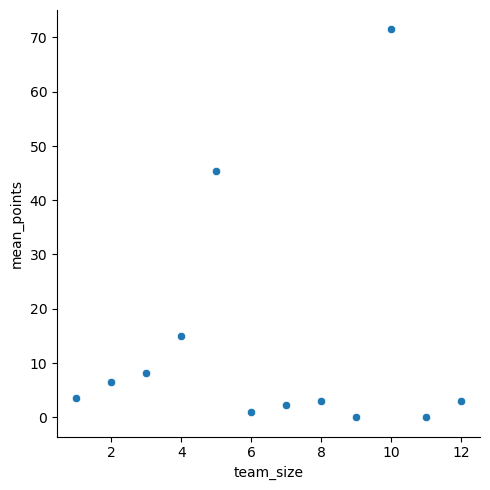

In [260]:
#проверяем зависимость размера команд и колличеством баллов

team_point_grouped = (
    team_game_points.groupby('team_size')['total_points_per_team']
    .mean()
    .to_frame()
    .reset_index()
    .rename(columns={'total_points_per_team':'mean_points'})
)
display(team_point_grouped)
display(team_point_grouped.describe())
#display(team_point_grouped.query('median_points == 52618.5'))

#team_points.plot(title='Зависимость', style='o-', grid=True, xlim=(0, 3000), ylim=(0, 300))

sns.relplot(x="team_size", y="mean_points", data=team_point_grouped);

#### Считаем количество баллов в каждой команде по таблице game_transaction 

In [261]:
points_per_team = (
    game_transaction.groupby(['teamId', 'gameId', 'game_name', 'city_name', 'region_name', 'game_month'])
    .agg({'sum':'sum', 'participantId':'nunique'})
    .reset_index()
    .rename(columns={'sum':'total_points_per_team', 'participantId':'team_size'})
    .sort_values(by='total_points_per_team', ascending=False)
    .reset_index()
)

points_per_team = points_per_team.merge(game_format[['gameId', 'format_type', 'participant_count']], on='gameId', how='left')
points_per_team = points_per_team.query('team_size != 0')
points_per_team.head()
# participant_count - количество человек принявших участие в игре

,index,teamId,gameId,game_name,city_name,region_name,game_month,total_points_per_team,team_size,format_type,participant_count
0,18154,c8324740-19c6-11ec-9eb4-1fd8173adb8f,b9375f90-2328-11eb-81ad-c17c8d681b10,Чистые Игры. Тестовая игра для организаторов (...,Санкт-Петербург,Санкт-Петербург и Лен.область,12.00,11111505.00,8,big,799.00
1,1088,09b77c90-93ac-11eb-93c9-b5c59851414e,b9375f90-2328-11eb-81ad-c17c8d681b10,Чистые Игры. Тестовая игра для организаторов (...,Санкт-Петербург,Санкт-Петербург и Лен.область,12.00,10000465.80,45,big,799.00
2,1943,11a5d820-b3eb-11eb-b0e8-4f60062d4b7d,b9375f90-2328-11eb-81ad-c17c8d681b10,Чистые Игры. Тестовая игра для организаторов (...,Санкт-Петербург,Санкт-Петербург и Лен.область,12.00,906012.90,10,big,799.00
3,9542,6511c3c0-2a52-11eb-acaa-4f7805fd41e9,b9375f90-2328-11eb-81ad-c17c8d681b10,Чистые Игры. Тестовая игра для организаторов (...,Санкт-Петербург,Санкт-Петербург и Лен.область,12.00,52618.50,89,big,799.00
4,7841,51845af0-6cf4-11ea-ba81-110ce13b5f34,2ccf61f0-6cf4-11ea-ba81-110ce13b5f34,Русско-японские соревнования по сбору мусора,Москва,Москва и Мос.область,9.00,8246.50,2,medium,176.00


,team_size,median_points
0,1,88.79
1,2,87.38
2,3,112.85
3,4,132.08
4,5,144.06
5,6,163.16
6,7,200.97
7,8,173827.37
8,9,156.26
9,10,75709.57


,team_size,median_points
count,29.00,29.00
mean,26.62,355657.79
std,28.99,1855299.01
min,1.00,87.38
25%,8.00,170.70
50%,15.00,292.00
75%,34.00,1027.40
max,129.00,10000465.80


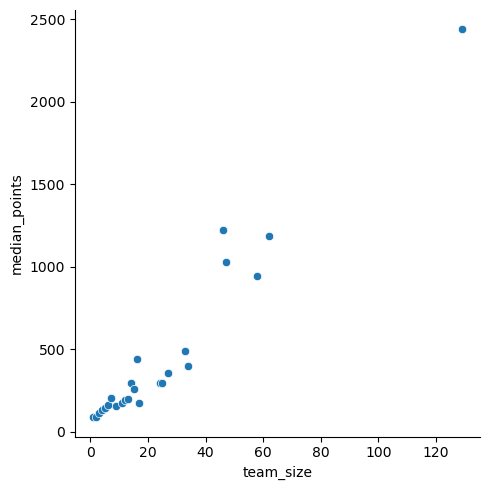

In [262]:
#проверяем зависимость размера команд и колличеством баллов

team_points = (
    points_per_team.groupby('team_size')['total_points_per_team']
    .mean()
    .to_frame()
    .reset_index()
    .rename(columns={'total_points_per_team':'median_points'})
)
display(team_points)
display(team_points.describe())
#display(team_points.query('median_points == 52618.5'))

sns.relplot(x="team_size", y="median_points", data=team_points.query('median_points < 50000'));

In [263]:
participant_points = (
    game_transaction.groupby(['participantId', 'teamId', 'game_name', 'city_name', 'region_name'])['sum'].sum()
    .reset_index()
    .rename(columns={'sum':'total_points'})
    .sort_values(by='total_points', ascending=False)
    .reset_index()
)
#participant_points.head(10)

## Вывод

#### Игры-лидеры по количеству баллов:
- Чистые Игры. Тестовая игра для организаторов
- Русско-японские соревнования по сбору мусора (удивительно, что эта игра занимает второе место, хотя ранее она почти не обозначалась в исследовании)
- Чистые Игры в Ярушкинском Дендропарке (и эта игра ранее не обозначалась в исследовании)	
- Чистый Приорат
- Чистые Куйвози 4


## 4. Какие игры привлекают наибольшее число участников


Можно сказать, что частично это зависит от классификации Чистых Игр и кто является организаторами (спонсорами).
Например, по названиям некоторых игр можно сделать вывод, что их проводят среди учеников школ. Или, например, игры большого формата, которые проводились в Омске, вероятно, организатором выступала администрация города. На сайте Чистых Игр также есть данные, где организаторами выступает крупные компании (Сбербанк, Лента и тд). Все это разные кейсы.

Может быть, участников больше привлекает основная идея конкретной игры. Например, не просто помочь природе, а сделать родной город чистым и красивым. То есть тут скорее вопрос мотивации.